In [1303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

data=pd.read_csv("Dsata Set for Assignment 1 (1).csv")
data.drop("id",axis=1,inplace=True)
data_modified = data.replace("M",1).replace("B",0)
# data_modified.dropna(inplace=True)
for column in data_modified.columns[1:]:
    data_modified[column] = (data_modified[column] - data_modified[column].mean())/data_modified[column].std()
data_modified.fillna(0,inplace= True)
df= data_modified.sample(frac=2/3)
x_train= df.drop("diagnosis",axis=1)
y_train = df["diagnosis"]
x_test = data_modified.drop(df.index)
y_test = x_test["diagnosis"]
x_test=x_test.drop("diagnosis",axis=1)
x_train= x_train.to_numpy()
y_train= y_train.to_numpy()
x_test=x_test.to_numpy()
y_test=y_test.to_numpy()


In [1304]:
def sigmoid(w,x):
    y= np.dot(w,x)
    if y<0:
        return np.exp(y)/(1+np.exp(y))
    else:
        return 1/(1+np.exp(-y))
  
def cost(w,x,y):
    z=0
    for i in range(len(x)):
        h= sigmoid(w,x[i])
        if h==1:
            h=1-(10**(-16))
        elif h==0:
            h=10**(-16)
        y1=y[i]
        z = z + (-((y1*np.log(h))+((1-y1)*np.log((1-h)))))
    return z/len(y)
def grad(w,x,y):
    h= sigmoid(w,x)
    return (h-y)*x


In [1305]:
def grad_batch(w,x,y):
    grad1=np.zeros(30)
    for i in range(len(x)):
        grad1= grad1+(grad(w,x[i],y[i]))
    return grad1/x.shape[0]

def batch(x,y,lr):
    w= np.zeros(30)
    e2=1
    e1=0
    print(lr)
    e_list = []
    epoch_count = 0
    while abs(e2-e1)>=0.00001:
        e1= cost(w,x,y)
        w = w - lr*(grad_batch(w,x,y))
        e2= cost(w,x,y)
        e_list.append(e2)
        epoch_count += 1
        # print(abs(e2-e1))
    return w, e_list, epoch_count

def minibatch(x,y,batch_size,lr):
    w=np.zeros(30)
    e2=1
    e1=0
    e_list = []
    epoch_count = 0
    while abs(e2-e1)>=0.00001 :
        k = np.random.randint(0,(len(x)-batch_size))
        x1 = x[k:(k+batch_size)]
        y1 =y[k:(k+batch_size)]
        e1=cost(w,x1,y1)
        w= w- lr*(grad_batch(w,x1,y1))
        e2 = cost(w,x,y)
        # print(abs(e2-e1))
        e_list.append(e2)
        epoch_count += 1
    
    return w, e_list, epoch_count


def stoch(x,y,lr):
    w= np.zeros(30)
    size = len(x)
    e2=1
    e1=0
    e_list = []
    epoch_count = 0
    print(size)
    while np.abs(e2-e1)>=0.00000001:
            j= np.random.randint(0,size)
            e1= cost(w,x,y)
            w= w-lr*grad(w,x[j],y[j]) 
            e2= cost(w,x,y)
            # print(np.abs(e2-e1))
            e_list.append(e2)
            epoch_count += 1
    return w, e_list, epoch_count
w1,e1,ep1 =batch(x_train,y_train,0.001)
w2,e2,ep2 = minibatch(x_train,y_train,50,0.001)
w3,e3,ep3 = stoch(x_train,y_train,0.001)

0.001
379


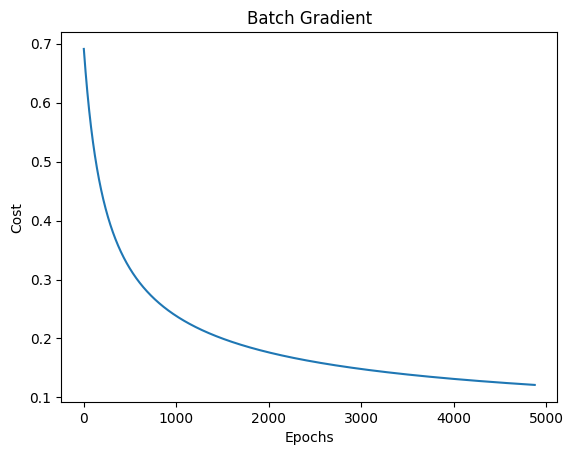

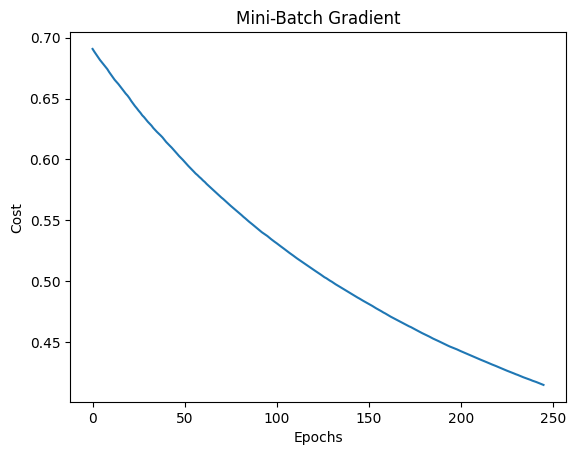

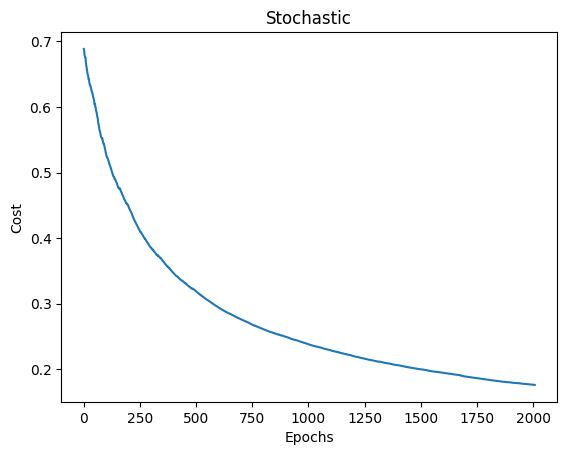

In [1306]:
import matplotlib.pyplot as plt
plt.plot(range(ep1), e1)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title("Batch Gradient")
plt.show()

plt.plot(range(ep2), e2)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title("Mini-Batch Gradient")
plt.show()

plt.plot(range(ep3), e3)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title("Stochastic")
plt.show()

In [ ]:
def prediction(x,w,threshold):
    x=x.T
    h = sigmoid(w,x)
    if h>=threshold:
        return 1
    else:
        return 0

def evaluate(x,y,w,threshold):
    count=np.zeros((2,2))
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    
    for i in range(len(x)):
        pred = prediction(x[i],w,threshold)
        if y[i] == 0 and pred == 0:
          tn += 1
        if y[i] == 0 and pred == 1:
          fp += 1
        if y[i] == 1 and pred == 0:
          fn += 1
        if y[i] == 1 and pred == 1:
          tp += 1
    
    count[0][0]=tn
    count[0][1]=fp
    count[1][0]=fn
    count[1][1]=tp
   
     
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    
    return precision,recall,accuracy

precision,recall,accuracy = evaluate(x_test,y_test,w2,0.5)
print(accuracy)

0.9315789473684211


## Around 95% accuracy is coming 

In [1312]:
def models(mode,lr,threshold,batch_size):

    if(mode==0):
        el=[]
        w = np.zeros(30)
        e = []
        ep = np.zeros((5,))
        a = np.zeros((5,10))
        p= np.zeros((5,10))
        r= np.zeros((5,10))
        wh=np.zeros(30)
        eh=[]
        eph=0
        ac1=0
        pr1=0
        re1=0


        for i in range(10):
            print("BATCH")
            df= data_modified.sample(frac=2/3)
            x_train= df.drop("diagnosis",axis=1)
            y_train = df["diagnosis"]
            x_test = data_modified.drop(df.index)
            y_test = x_test["diagnosis"]
            x_test=x_test.drop("diagnosis",axis=1)
            print(x_test,x_train,y_test,y_train)
            x_train= x_train.to_numpy()
            y_train= y_train.to_numpy()
            x_test=x_test.to_numpy()
            y_test=y_test.to_numpy()
            w,eh,eph = batch(x_train,y_train,lr)
            for j in range(len(threshold)):
                print("Threshold =", threshold[j])
                pr1,re1,ac1= evaluate(x_test,y_test,w,threshold[j])
                print(ac1,re1,pr1)
                a[j][i]+= ac1
                p[j][i]+= pr1
                r[j][i]+= re1
                e.append(el)
            
                if threshold[j]==0.5:
                   
                    plt.plot(range(eph), eh)
                    plt.xlabel('Epochs')
                    plt.ylabel('Cost')
                    plt.title("Batch with threshold =0.5")
                    plt.show()
        
        for i in range(len(threshold)):
            av_ac=0
            av_pr=0
            av_re=0
            for j in range(10):

                av_ac+=a[i][j]/10
                av_pr+=p[i][j]/10
                av_re+=r[i][j]/10


            av_ac=av_ac
            av_pr=av_pr
            av_re=av_re
            print("Average acucuracy for ",threshold[i],"threshold is =", av_ac)
            print("Average precision for ",threshold[i],"threshold is =", av_pr) 
            print("Average recall for ",threshold[i],"threshold is =", av_re) 

    


    

    elif (mode==1):    
        el=[]
        w = np.zeros(30)
        e = []
        ep = np.zeros((5,1))
        a = np.zeros((5,10))
        p= np.zeros((5,10))
        r= np.zeros((5,10))
        wh=np.zeros(30)
        eh=[]
        eph=0
        ac1=0
        pr1=0
        re1=0
        print("MINI-BATCH")
        for i in range(10):
            df= data_modified.sample(frac=2/3)
            x_train= df.drop("diagnosis",axis=1)
            y_train = df["diagnosis"]
            x_test = data_modified.drop(df.index)
            y_test = x_test["diagnosis"]
            x_test=x_test.drop("diagnosis",axis=1)
            x_train= x_train.to_numpy()
            y_train= y_train.to_numpy()
            x_test=x_test.to_numpy()
            y_test=y_test.to_numpy()
            w,eh,eph = minibatch(x_train,y_train,batch_size,lr)
            for j in range(len(threshold)):
                print("Threshold =", threshold[j])
                pr1,re1,ac1= evaluate(x_test,y_test,w,threshold[j])
                a[j][i]+= ac1
                p[j][i]+= pr1
                r[j][i]+= re1
                e.append(el)
                if threshold[j]==0.5:

                    plt.plot(range(eph), eh)
                    plt.xlabel('Epochs')
                    plt.ylabel('Cost')
                    plt.title("Mini-Batch with threshold =0.5")
                    plt.show()
        
        for i in range(len(threshold)):
            av_ac=0
            av_pr=0
            av_re=0
            for j in range(10):

                av_ac+=a[i][j]/10
                av_pr+=p[i][j]/10
                av_re+=r[i][j]/10


            av_ac=av_ac
            av_pr=av_pr
            av_re=av_re
            print("Average acucuracy for ",threshold[i],"threshold is =", av_ac)
            print("Average precision for ",threshold[i],"threshold is =", av_pr) 
            print("Average recall for ",threshold[i],"threshold is =", av_re) 


    else:
        el=[]
        w = np.zeros(30)
        e = []
        ep = np.zeros((5,1))
        a = np.zeros((5,10))
        p= np.zeros((5,10))
        r= np.zeros((5,10))
        wh=np.zeros(30)
        eh=[]
        ac1=0
        pr1=0
        re1=0
        eph=0
        print("STOCHASTIC")

        for i in range(10):
            df= data_modified.sample(frac=2/3)
            x_train= df.drop("diagnosis",axis=1)
            y_train = df["diagnosis"]
            x_test = data_modified.drop(df.index)
            y_test = x_test["diagnosis"]
            x_test=x_test.drop("diagnosis",axis=1)
            x_train= x_train.to_numpy()
            y_train= y_train.to_numpy()
            x_test=x_test.to_numpy()
            y_test=y_test.to_numpy()
            w,eh,eph = stoch(x_train,y_train,lr)
            for j in range(len(threshold)):
                print("Threshold =", threshold[j])

                pr1,re1,ac1= evaluate(x_test,y_test,w,threshold[j])
                a[j][i]+= ac1
                p[j][i]+= pr1
                r[j][i]+= re1
                e.append(el)
                if threshold[j]==0.5:

                    plt.plot(range(eph), eh)
                    plt.xlabel('Epochs')
                    plt.ylabel('Cost')
                    plt.title("Stochastic with threshold =0.5",)
                    plt.show()
        

        for i in range(len(threshold)):
            av_ac=0
            av_pr=0
            av_re=0
            for j in range(10):

                av_ac+=a[i][j]/10
                av_pr+=p[i][j]/10
                av_re+=r[i][j]/10


            av_ac=av_ac
            av_pr=av_pr
            av_re=av_re
            print("Average acucuracy for ",threshold[i],"threshold is =", av_ac)
            print("Average precision for ",threshold[i],"threshold is =", av_pr) 
            print("Average recall for ",threshold[i],"threshold is =", av_re) 


Learning Rate= 0.01
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.101451     -2.071512        1.267272   0.983510         1.567087   
4       1.755405     -1.150804        1.773744   1.824624         0.280125   
6       1.175376      0.160508        1.135507   1.094332        -0.123028   
7      -0.115473      0.358135       -0.075084  -0.218772         1.602639   
10      0.541325      0.918465        0.439623   0.406096        -1.016791   
..           ...           ...             ...        ...              ...   
548    -1.260462      0.011707        0.000000  -1.049089        -0.814148   
549    -0.937181      1.143992       -0.952557  -0.833411        -1.026746   
553    -1.359976      0.616212       -1.359382  -1.110751        -0.281587   
554    -0.351465      2.239077       -0.392144  -0.399498        -1.075807   
558     0.134736      0.788264        0.179799   0.006282        -0.826946   

     compactness_mean  concavity_mean

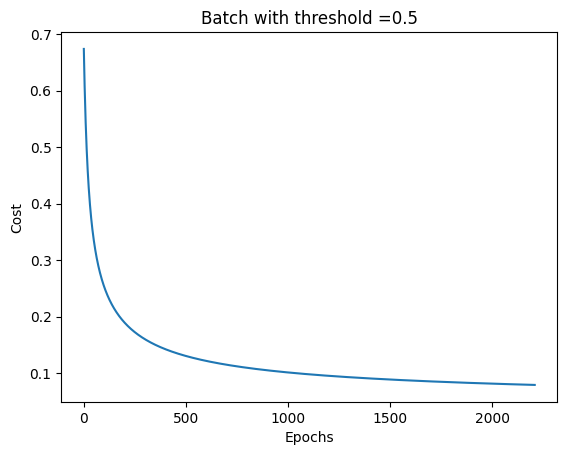

Threshold = 0.6
0.9578947368421052 0.9324324324324325 0.9583333333333334
Threshold = 0.7
0.968421052631579 0.918918918918919 1.0
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
1       1.835017     -0.353322        1.683156   1.907030        -0.826235   
3      -0.766584      0.253509       -0.594733  -0.763792         3.280667   
4       1.755405     -1.150804        1.773744   1.824624         0.280125   
7      -0.115473      0.358135       -0.075084  -0.218772         1.602639   
8      -0.317346      0.588312       -0.186261  -0.383870         2.199903   
..           ...           ...             ...        ...              ...   
558     0.134736      0.788264        0.179799   0.006282        -0.826946   
561    -0.829136      2.343703       -0.879263  -0.764076        -1.555040   
562     0.313863      2.634331        0.468447   0.176210         0.600088   
563     1.934532      1.348594        2.099039   1.966704         0.962713   
566    

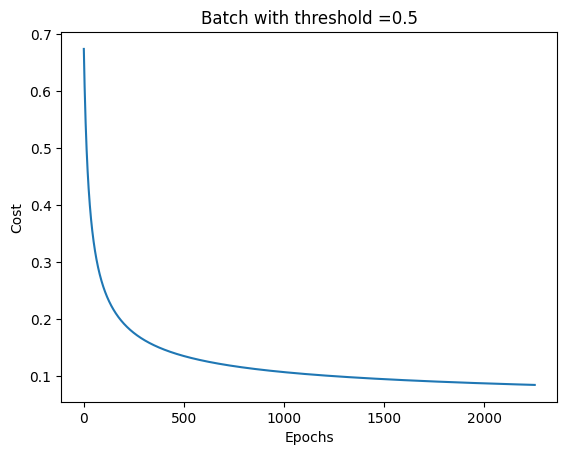

Threshold = 0.6
0.9789473684210527 0.971830985915493 0.971830985915493
Threshold = 0.7
0.9736842105263158 0.9295774647887324 1.0
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
1       1.835017     -0.353322        1.683156   1.907030        -0.826235   
2       1.584809      0.455786        1.563744   1.557513         0.941382   
3      -0.766584      0.253509       -0.594733  -0.763792         3.280667   
6       1.175376      0.160508        1.135507   1.094332        -0.123028   
7      -0.115473      0.358135       -0.075084  -0.218772         1.602639   
..           ...           ...             ...        ...              ...   
550    -0.925807      0.509261       -0.968204  -0.836537        -1.567838   
551    -0.849039      0.732463       -0.845498  -0.785672        -0.049792   
556    -1.124837      0.069832       -1.123852  -0.975207         0.280125   
563     1.934532      1.348594        2.099039   1.966704         0.962713   
565    

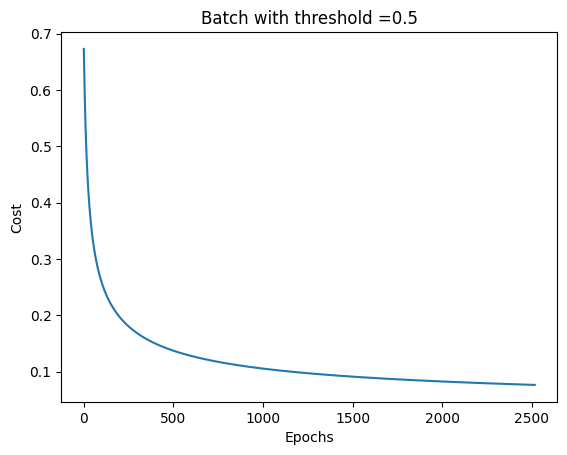

Threshold = 0.6
0.9842105263157894 0.9538461538461539 1.0
Threshold = 0.7
0.968421052631579 0.9076923076923077 1.0
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
4       1.755405     -1.150804        1.773744   1.824624         0.280125   
11      0.473086     -0.325421        0.476682   0.358357         0.052596   
13      0.492989      1.083542        0.480800   0.363188        -0.878141   
14     -0.109786      0.771989        0.064916  -0.217636         1.190242   
15      0.120520      1.918224        0.193799   0.011113         1.247125   
..           ...           ...             ...        ...              ...   
551    -0.849039      0.732463       -0.845498  -0.785672        -0.049792   
553    -1.359976      0.616212       -1.359382  -1.110751        -0.281587   
556    -1.124837      0.069832       -1.123852  -0.975207         0.280125   
557    -1.334387      1.997275       -1.349088  -1.090008        -1.075807   
558     0.134736     

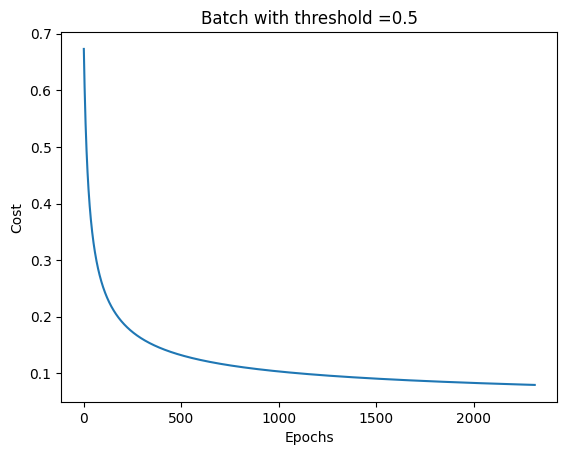

Threshold = 0.6
0.9578947368421052 0.9253731343283582 0.9538461538461539
Threshold = 0.7
0.9631578947368421 0.9104477611940298 0.9838709677419355
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
3      -0.766584      0.253509       -0.594733  -0.763792         3.280667   
15      0.120520      1.918224        0.193799   0.011113         1.247125   
18      1.618928      0.665038        1.563744   1.719485         0.138631   
22      0.347982     -1.169404        0.431388   0.140690         0.777846   
23      2.002771      0.871965        1.860215   2.128675        -0.147914   
..           ...           ...             ...        ...              ...   
549    -0.937181      1.143992       -0.952557  -0.833411        -1.026746   
554    -0.351465      2.239077       -0.392144  -0.399498        -1.075807   
555    -1.087874      1.934499       -1.085146  -0.947643        -0.430903   
557    -1.334387      1.997275       -1.349088  -1.090008        -1.

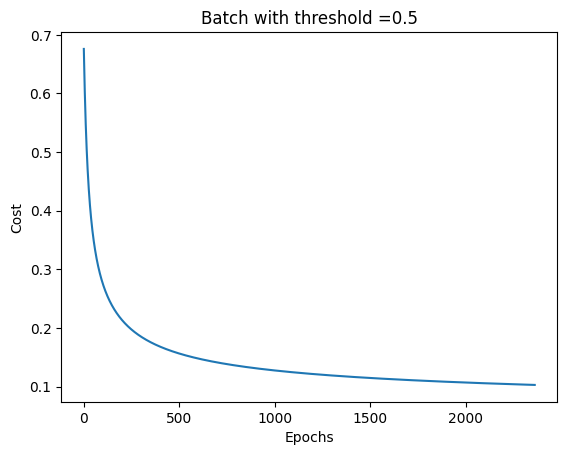

Threshold = 0.6
0.9947368421052631 0.9873417721518988 1.0
Threshold = 0.7
0.9789473684210527 0.9493670886075949 1.0
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
2       1.584809      0.455786        1.563744   1.557513         0.941382   
5      -0.473726     -0.834601       -0.389261  -0.505206         2.235455   
6       1.175376      0.160508        1.135507   1.094332        -0.123028   
11      0.473086     -0.325421        0.476682   0.358357         0.052596   
12      1.436958      1.281168        1.662567   1.330185         0.073927   
..           ...           ...             ...        ...              ...   
556    -1.124837      0.069832       -1.123852  -0.975207         0.280125   
559    -0.740994      1.078892       -0.720733  -0.714348        -0.266656   
566     0.706235      2.043775        0.670212   0.577445        -0.839745   
567     1.843547      2.334403        1.979627   1.733693         1.524426   
568    -1.807224    

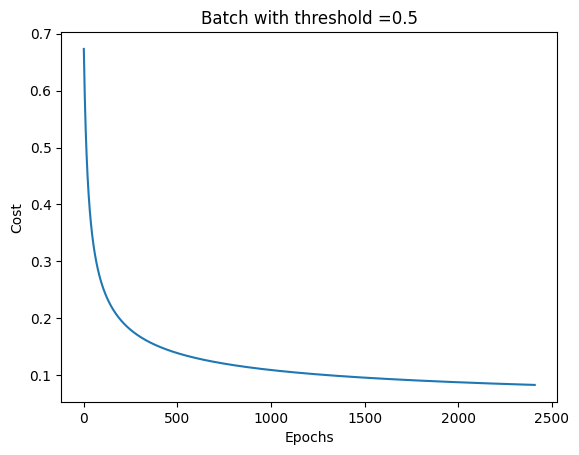

Threshold = 0.6
0.968421052631579 0.9393939393939394 0.96875
Threshold = 0.7
0.9736842105263158 0.9242424242424242 1.0
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.101451     -2.071512        1.267272   0.983510         1.567087   
1       1.835017     -0.353322        1.683156   1.907030        -0.826235   
2       1.584809      0.455786        1.563744   1.557513         0.941382   
5      -0.473726     -0.834601       -0.389261  -0.505206         2.235455   
6       1.175376      0.160508        1.135507   1.094332        -0.123028   
..           ...           ...             ...        ...              ...   
553    -1.359976      0.616212       -1.359382  -1.110751        -0.281587   
558     0.134736      0.788264        0.179799   0.006282        -0.826946   
564     2.116502      0.720838        2.057863   2.341795         1.040926   
565     1.709913      2.083301        1.613156   1.722326         0.102368   
568    -1.807224 

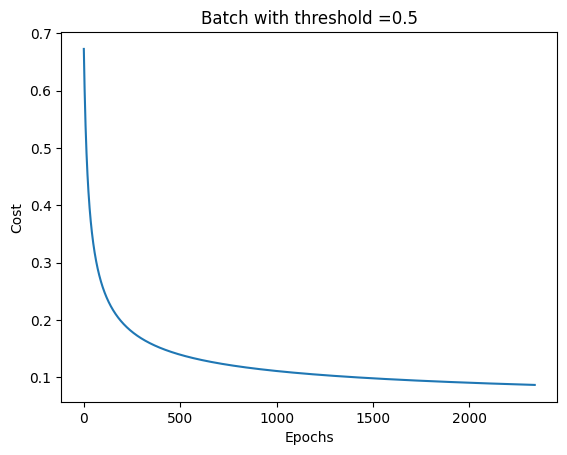

Threshold = 0.6
0.9842105263157894 0.9705882352941176 0.9850746268656716
Threshold = 0.7
0.968421052631579 0.9264705882352942 0.984375
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.101451     -2.071512        1.267272   0.983510         1.567087   
1       1.835017     -0.353322        1.683156   1.907030        -0.826235   
2       1.584809      0.455786        1.563744   1.557513         0.941382   
3      -0.766584      0.253509       -0.594733  -0.763792         3.280667   
5      -0.473726     -0.834601       -0.389261  -0.505206         2.235455   
..           ...           ...             ...        ...              ...   
550    -0.925807      0.509261       -0.968204  -0.836537        -1.567838   
558     0.134736      0.788264        0.179799   0.006282        -0.826946   
563     1.934532      1.348594        2.099039   1.966704         0.962713   
565     1.709913      2.083301        1.613156   1.722326         0.102368   
5

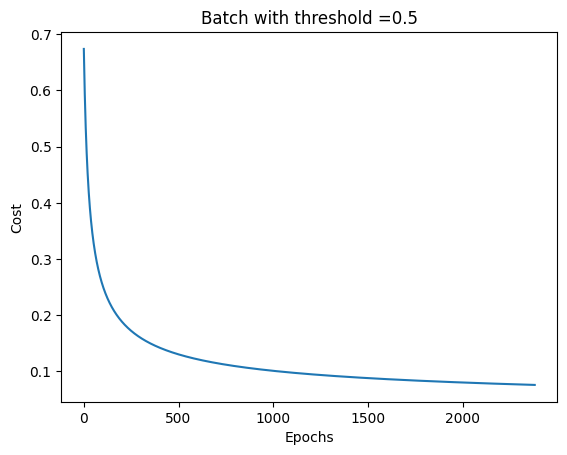

Threshold = 0.6
0.9789473684210527 0.948051948051948 1.0
Threshold = 0.7
0.9631578947368421 0.9090909090909091 1.0
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
1       1.835017     -0.353322        1.683156   1.907030        -0.826235   
5      -0.473726     -0.834601       -0.389261  -0.505206         2.235455   
8      -0.317346      0.588312       -0.186261  -0.383870         2.199903   
20     -0.294599     -0.832276       -0.263261  -0.383301         0.792066   
21     -1.311356     -1.592558       -1.304617  -1.082620         0.429441   
..           ...           ...             ...        ...              ...   
555    -1.087874      1.934499       -1.085146  -0.947643        -0.430903   
557    -1.334387      1.997275       -1.349088  -1.090008        -1.075807   
558     0.134736      0.788264        0.179799   0.006282        -0.826946   
566     0.706235      2.043775        0.670212   0.577445        -0.839745   
568    -1.807224     

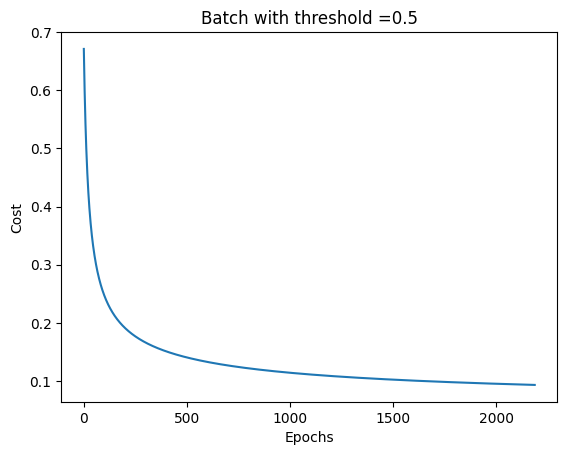

Threshold = 0.6
0.9894736842105263 0.96875 1.0
Threshold = 0.7
0.9578947368421052 0.875 1.0
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.101451     -2.071512        1.267272   0.983510         1.567087   
4       1.755405     -1.150804        1.773744   1.824624         0.280125   
8      -0.317346      0.588312       -0.186261  -0.383870         2.199903   
9      -0.470883      1.104467       -0.331614  -0.508616         1.581308   
11      0.473086     -0.325421        0.476682   0.358357         0.052596   
..           ...           ...             ...        ...              ...   
547    -1.096404     -0.629999       -1.077734  -0.949348        -0.539691   
550    -0.925807      0.509261       -0.968204  -0.836537        -1.567838   
551    -0.849039      0.732463       -0.845498  -0.785672        -0.049792   
554    -0.351465      2.239077       -0.392144  -0.399498        -1.075807   
567     1.843547      2.334403        1.9796

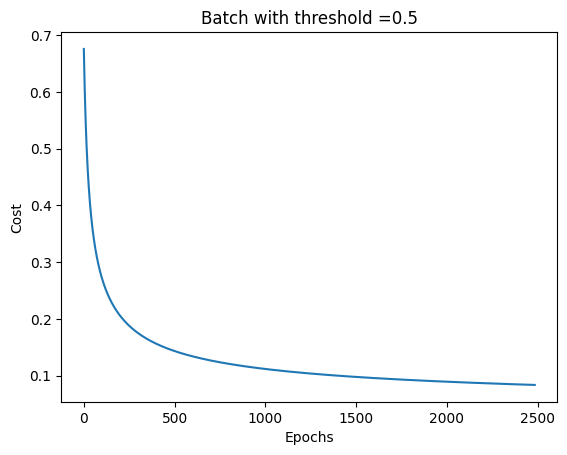

Threshold = 0.6
0.9842105263157894 0.961038961038961 1.0
Threshold = 0.7
0.968421052631579 0.922077922077922 1.0
Average acucuracy for  0.3 threshold is = 0.9626315789473685
Average precision for  0.3 threshold is = 0.9224480825557303
Average recall for  0.3 threshold is = 0.9814298537275821
Average acucuracy for  0.4 threshold is = 0.9726315789473685
Average precision for  0.4 threshold is = 0.9522598593825435
Average recall for  0.4 threshold is = 0.9743082498412724
Average acucuracy for  0.5 threshold is = 0.9747368421052632
Average precision for  0.5 threshold is = 0.9642869604717514
Average recall for  0.5 threshold is = 0.9670880083626354
Average acucuracy for  0.6 threshold is = 0.9778947368421054
Average precision for  0.6 threshold is = 0.9837835099960652
Average recall for  0.6 threshold is = 0.9558647562453304
Average acucuracy for  0.7 threshold is = 0.9684210526315788
Average precision for  0.7 threshold is = 0.9968245967741934
Average recall for  0.7 threshold is = 0.9172

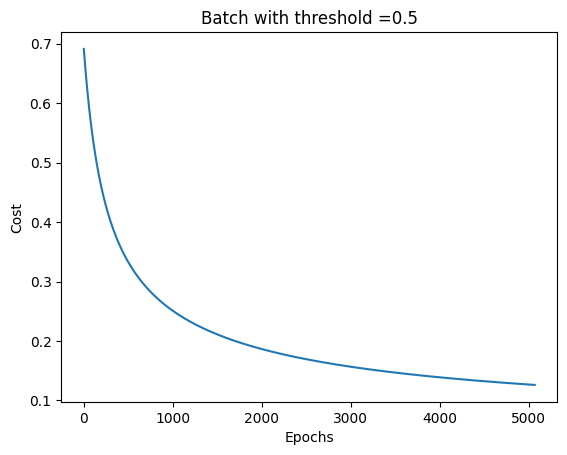

Threshold = 0.6
0.9631578947368421 0.9411764705882353 0.9552238805970149
Threshold = 0.7
0.9315789473684211 0.8235294117647058 0.9824561403508771
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
2       1.584809      0.455786        1.563744   1.557513         0.941382   
4       1.755405     -1.150804        1.773744   1.824624         0.280125   
7      -0.115473      0.358135       -0.075084  -0.218772         1.602639   
8      -0.317346      0.588312       -0.186261  -0.383870         2.199903   
12      1.436958      1.281168        1.662567   1.330185         0.073927   
..           ...           ...             ...        ...              ...   
562     0.313863      2.634331        0.468447   0.176210         0.600088   
564     2.116502      0.720838        2.057863   2.341795         1.040926   
565     1.709913      2.083301        1.613156   1.722326         0.102368   
567     1.843547      2.334403        1.979627   1.733693         1.

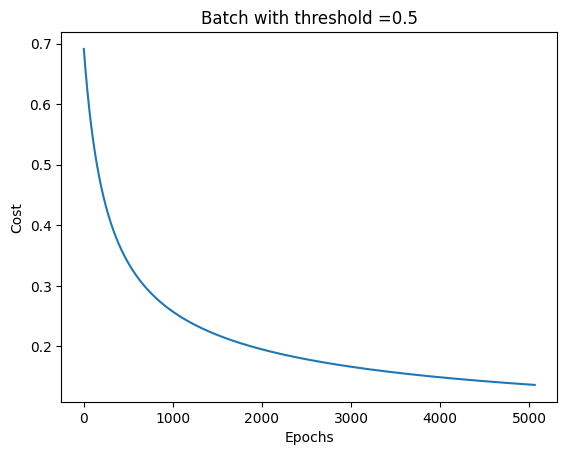

Threshold = 0.6
0.968421052631579 0.9295774647887324 0.9850746268656716
Threshold = 0.7
0.9526315789473684 0.8873239436619719 0.984375
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.101451     -2.071512        1.267272   0.983510         1.567087   
1       1.835017     -0.353322        1.683156   1.907030        -0.826235   
8      -0.317346      0.588312       -0.186261  -0.383870         2.199903   
12      1.436958      1.281168        1.662567   1.330185         0.073927   
14     -0.109786      0.771989        0.064916  -0.217636         1.190242   
..           ...           ...             ...        ...              ...   
556    -1.124837      0.069832       -1.123852  -0.975207         0.280125   
558     0.134736      0.788264        0.179799   0.006282        -0.826946   
563     1.934532      1.348594        2.099039   1.966704         0.962713   
565     1.709913      2.083301        1.613156   1.722326         0.102368   
5

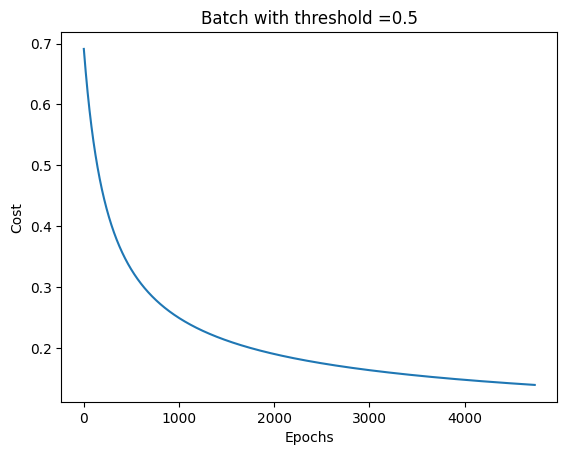

Threshold = 0.6
0.9421052631578948 0.8923076923076924 0.9354838709677419
Threshold = 0.7
0.9421052631578948 0.8769230769230769 0.95
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.101451     -2.071512        1.267272   0.983510         1.567087   
1       1.835017     -0.353322        1.683156   1.907030        -0.826235   
4       1.755405     -1.150804        1.773744   1.824624         0.280125   
7      -0.115473      0.358135       -0.075084  -0.218772         1.602639   
10      0.541325      0.918465        0.439623   0.406096        -1.016791   
..           ...           ...             ...        ...              ...   
562     0.313863      2.634331        0.468447   0.176210         0.600088   
564     2.116502      0.720838        2.057863   2.341795         1.040926   
565     1.709913      2.083301        1.613156   1.722326         0.102368   
566     0.706235      2.043775        0.670212   0.577445        -0.839745   
567 

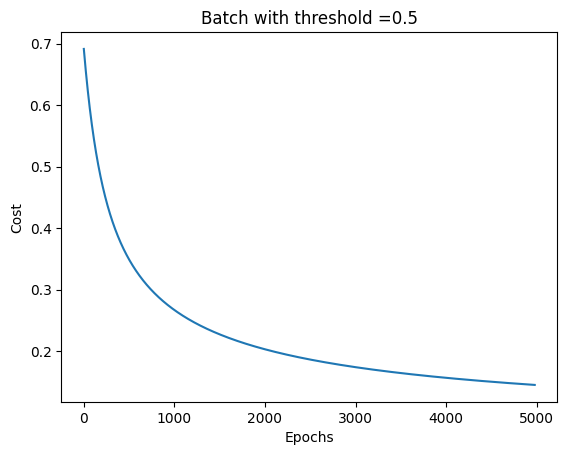

Threshold = 0.6
0.9842105263157894 0.961038961038961 1.0
Threshold = 0.7
0.9473684210526315 0.8701298701298701 1.0
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
1       1.835017     -0.353322        1.683156   1.907030        -0.826235   
2       1.584809      0.455786        1.563744   1.557513         0.941382   
3      -0.766584      0.253509       -0.594733  -0.763792         3.280667   
4       1.755405     -1.150804        1.773744   1.824624         0.280125   
6       1.175376      0.160508        1.135507   1.094332        -0.123028   
..           ...           ...             ...        ...              ...   
556    -1.124837      0.069832       -1.123852  -0.975207         0.280125   
558     0.134736      0.788264        0.179799   0.006282        -0.826946   
560    -0.018801      1.827549       -0.026496  -0.154836         0.208311   
564     2.116502      0.720838        2.057863   2.341795         1.040926   
567     1.843547     

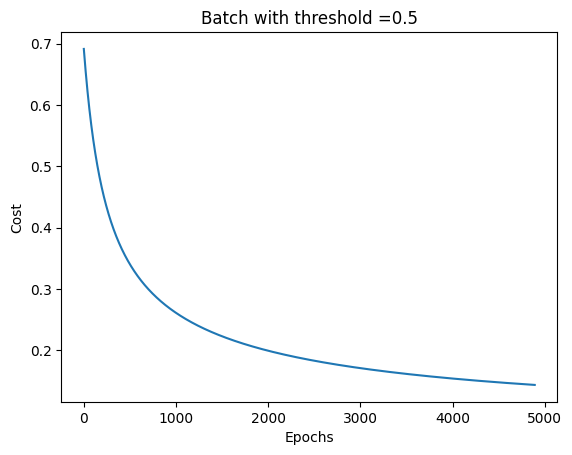

Threshold = 0.6
0.968421052631579 0.9342105263157895 0.9861111111111112
Threshold = 0.7
0.9526315789473684 0.881578947368421 1.0
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
1       1.835017     -0.353322        1.683156   1.907030        -0.826235   
2       1.584809      0.455786        1.563744   1.557513         0.941382   
3      -0.766584      0.253509       -0.594733  -0.763792         3.280667   
4       1.755405     -1.150804        1.773744   1.824624         0.280125   
6       1.175376      0.160508        1.135507   1.094332        -0.123028   
..           ...           ...             ...        ...              ...   
559    -0.740994      1.078892       -0.720733  -0.714348        -0.266656   
561    -0.829136      2.343703       -0.879263  -0.764076        -1.555040   
563     1.934532      1.348594        2.099039   1.966704         0.962713   
564     2.116502      0.720838        2.057863   2.341795         1.040926   
565    

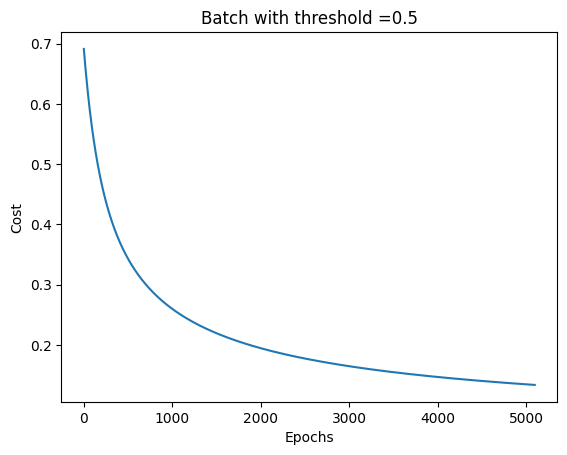

Threshold = 0.6
0.9526315789473684 0.9024390243902439 0.9866666666666667
Threshold = 0.7
0.9421052631578948 0.8658536585365854 1.0
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
2       1.584809      0.455786        1.563744   1.557513         0.941382   
6       1.175376      0.160508        1.135507   1.094332        -0.123028   
9      -0.470883      1.104467       -0.331614  -0.508616         1.581308   
13      0.492989      1.083542        0.480800   0.363188        -0.878141   
14     -0.109786      0.771989        0.064916  -0.217636         1.190242   
..           ...           ...             ...        ...              ...   
546    -1.079345     -0.683475       -1.099969  -0.937698        -0.143648   
548    -1.260462      0.011707        0.000000  -1.049089        -0.814148   
557    -1.334387      1.997275       -1.349088  -1.090008        -1.075807   
559    -0.740994      1.078892       -0.720733  -0.714348        -0.266656   
562  

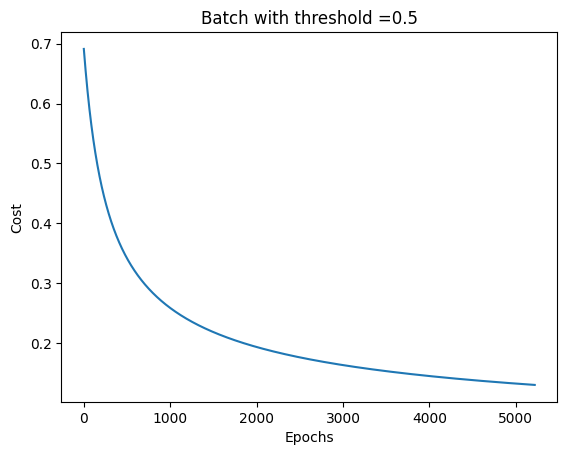

Threshold = 0.6
0.9526315789473684 0.9078947368421053 0.971830985915493
Threshold = 0.7
0.9421052631578948 0.8552631578947368 1.0
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
2       1.584809      0.455786        1.563744   1.557513         0.941382   
3      -0.766584      0.253509       -0.594733  -0.763792         3.280667   
6       1.175376      0.160508        1.135507   1.094332        -0.123028   
10      0.541325      0.918465        0.439623   0.406096        -1.016791   
13      0.492989      1.083542        0.480800   0.363188        -0.878141   
..           ...           ...             ...        ...              ...   
558     0.134736      0.788264        0.179799   0.006282        -0.826946   
562     0.313863      2.634331        0.468447   0.176210         0.600088   
563     1.934532      1.348594        2.099039   1.966704         0.962713   
564     2.116502      0.720838        2.057863   2.341795         1.040926   
567   

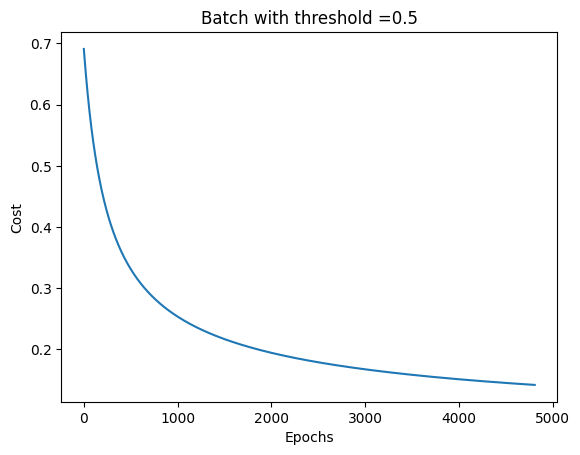

Threshold = 0.6
0.9736842105263158 0.967741935483871 0.9523809523809523
Threshold = 0.7
0.9631578947368421 0.8870967741935484 1.0
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
2       1.584809      0.455786        1.563744   1.557513         0.941382   
4       1.755405     -1.150804        1.773744   1.824624         0.280125   
7      -0.115473      0.358135       -0.075084  -0.218772         1.602639   
8      -0.317346      0.588312       -0.186261  -0.383870         2.199903   
9      -0.470883      1.104467       -0.331614  -0.508616         1.581308   
..           ...           ...             ...        ...              ...   
557    -1.334387      1.997275       -1.349088  -1.090008        -1.075807   
562     0.313863      2.634331        0.468447   0.176210         0.600088   
563     1.934532      1.348594        2.099039   1.966704         0.962713   
565     1.709913      2.083301        1.613156   1.722326         0.102368   
568   

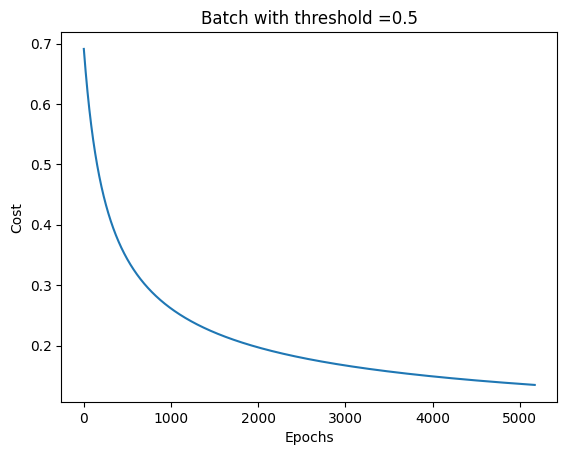

Threshold = 0.6
0.9789473684210527 0.9459459459459459 1.0
Threshold = 0.7
0.9736842105263158 0.9324324324324325 1.0
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
4       1.755405     -1.150804        1.773744   1.824624         0.280125   
5      -0.473726     -0.834601       -0.389261  -0.505206         2.235455   
8      -0.317346      0.588312       -0.186261  -0.383870         2.199903   
15      0.120520      1.918224        0.193799   0.011113         1.247125   
16      0.160325      0.195384        0.111857   0.084142         0.164228   
..           ...           ...             ...        ...              ...   
557    -1.334387      1.997275       -1.349088  -1.090008        -1.075807   
560    -0.018801      1.827549       -0.026496  -0.154836         0.208311   
561    -0.829136      2.343703       -0.879263  -0.764076        -1.555040   
566     0.706235      2.043775        0.670212   0.577445        -0.839745   
567     1.843547    

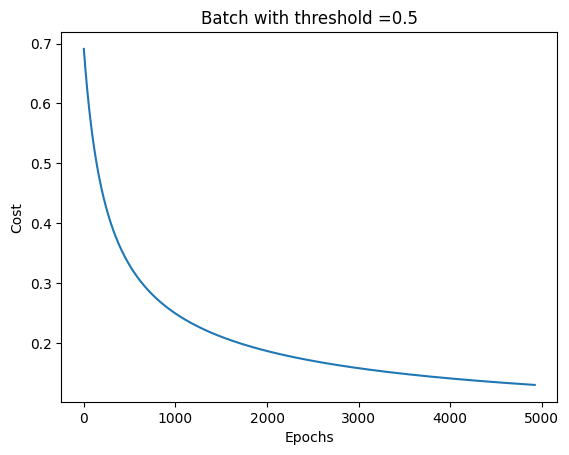

Threshold = 0.6
0.9631578947368421 0.9508196721311475 0.9354838709677419
Threshold = 0.7
0.9526315789473684 0.8524590163934426 1.0
Average acucuracy for  0.3 threshold is = 0.9236842105263159
Average precision for  0.3 threshold is = 0.8374539969143403
Average recall for  0.3 threshold is = 0.9860735719408465
Average acucuracy for  0.4 threshold is = 0.9563157894736842
Average precision for  0.4 threshold is = 0.9118661021440793
Average recall for  0.4 threshold is = 0.976147162355396
Average acucuracy for  0.5 threshold is = 0.9668421052631578
Average precision for  0.5 threshold is = 0.9463194165901849
Average recall for  0.5 threshold is = 0.9651962066593716
Average acucuracy for  0.6 threshold is = 0.9647368421052632
Average precision for  0.6 threshold is = 0.9708255965472392
Average recall for  0.6 threshold is = 0.9333152429832725
Average acucuracy for  0.7 threshold is = 0.9500000000000001
Average precision for  0.7 threshold is = 0.9916831140350876
Average recall for  0.7 thre

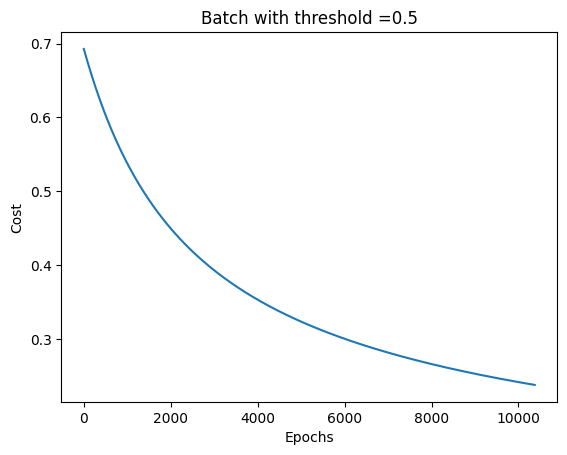

Threshold = 0.6
0.9052631578947369 0.7972972972972973 0.9516129032258065
Threshold = 0.7
0.9 0.7432432432432432 1.0
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.101451     -2.071512        1.267272   0.983510         1.567087   
3      -0.766584      0.253509       -0.594733  -0.763792         3.280667   
4       1.755405     -1.150804        1.773744   1.824624         0.280125   
5      -0.473726     -0.834601       -0.389261  -0.505206         2.235455   
6       1.175376      0.160508        1.135507   1.094332        -0.123028   
..           ...           ...             ...        ...              ...   
557    -1.334387      1.997275       -1.349088  -1.090008        -1.075807   
560    -0.018801      1.827549       -0.026496  -0.154836         0.208311   
561    -0.829136      2.343703       -0.879263  -0.764076        -1.555040   
564     2.116502      0.720838        2.057863   2.341795         1.040926   
568    -1.807224    

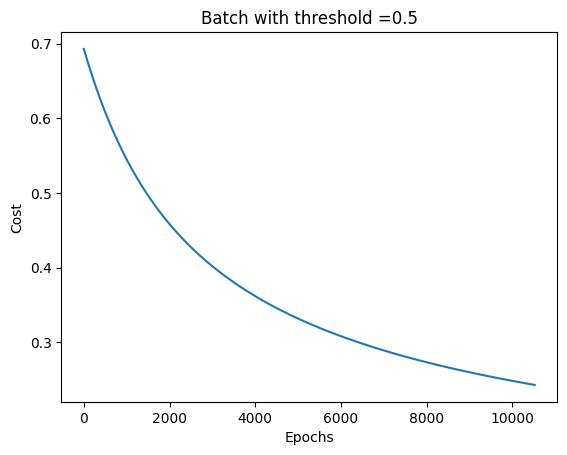

Threshold = 0.6
0.9526315789473684 0.8918918918918919 0.9850746268656716
Threshold = 0.7
0.9368421052631579 0.8378378378378378 1.0
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
2       1.584809      0.455786        1.563744   1.557513         0.941382   
12      1.436958      1.281168        1.662567   1.330185         0.073927   
13      0.492989      1.083542        0.480800   0.363188        -0.878141   
15      0.120520      1.918224        0.193799   0.011113         1.247125   
17      0.572601      0.323260        0.661977   0.408938         1.467543   
..           ...           ...             ...        ...              ...   
548    -1.260462      0.011707        0.000000  -1.049089        -0.814148   
556    -1.124837      0.069832       -1.123852  -0.975207         0.280125   
557    -1.334387      1.997275       -1.349088  -1.090008        -1.075807   
562     0.313863      2.634331        0.468447   0.176210         0.600088   
565  

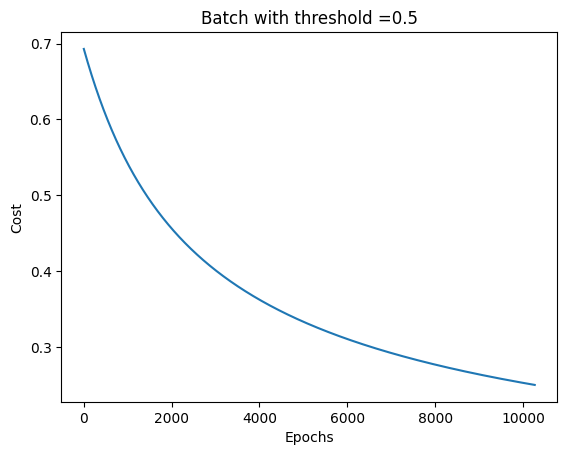

Threshold = 0.6
0.9315789473684211 0.8064516129032258 0.9803921568627451
Threshold = 0.7
0.9315789473684211 0.7903225806451613 1.0
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
1       1.835017     -0.353322        1.683156   1.907030        -0.826235   
4       1.755405     -1.150804        1.773744   1.824624         0.280125   
6       1.175376      0.160508        1.135507   1.094332        -0.123028   
11      0.473086     -0.325421        0.476682   0.358357         0.052596   
19     -0.163808     -1.146154       -0.187908  -0.251735         0.101657   
..           ...           ...             ...        ...              ...   
551    -0.849039      0.732463       -0.845498  -0.785672        -0.049792   
552    -0.382741      2.357653       -0.439497  -0.417685        -0.967019   
559    -0.740994      1.078892       -0.720733  -0.714348        -0.266656   
560    -0.018801      1.827549       -0.026496  -0.154836         0.208311   
566  

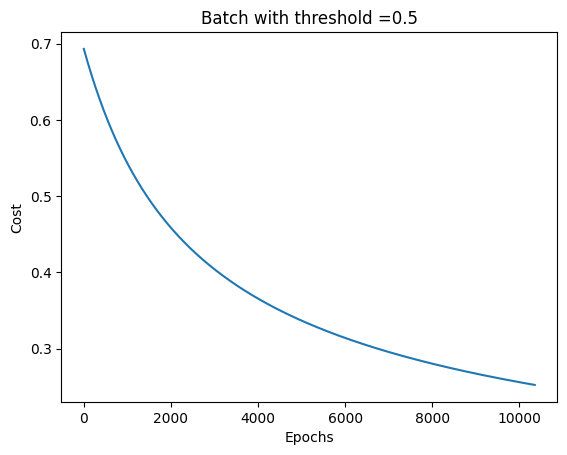

Threshold = 0.6
0.9526315789473684 0.875 0.9824561403508771
Threshold = 0.7
0.9473684210526315 0.84375 1.0
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
2       1.584809      0.455786        1.563744   1.557513         0.941382   
3      -0.766584      0.253509       -0.594733  -0.763792         3.280667   
4       1.755405     -1.150804        1.773744   1.824624         0.280125   
7      -0.115473      0.358135       -0.075084  -0.218772         1.602639   
9      -0.470883      1.104467       -0.331614  -0.508616         1.581308   
..           ...           ...             ...        ...              ...   
546    -1.079345     -0.683475       -1.099969  -0.937698        -0.143648   
547    -1.096404     -0.629999       -1.077734  -0.949348        -0.539691   
550    -0.925807      0.509261       -0.968204  -0.836537        -1.567838   
564     2.116502      0.720838        2.057863   2.341795         1.040926   
567     1.843547      2.33440

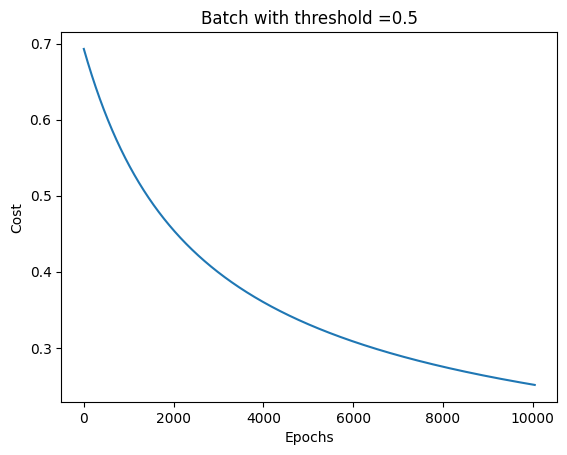

Threshold = 0.6
0.9157894736842105 0.875 0.9210526315789473
Threshold = 0.7
0.9052631578947369 0.8 0.9696969696969697
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
2       1.584809      0.455786        1.563744   1.557513         0.941382   
11      0.473086     -0.325421        0.476682   0.358357         0.052596   
15      0.120520      1.918224        0.193799   0.011113         1.247125   
18      1.618928      0.665038        1.563744   1.719485         0.138631   
20     -0.294599     -0.832276       -0.263261  -0.383301         0.792066   
..           ...           ...             ...        ...              ...   
561    -0.829136      2.343703       -0.879263  -0.764076        -1.555040   
562     0.313863      2.634331        0.468447   0.176210         0.600088   
564     2.116502      0.720838        2.057863   2.341795         1.040926   
565     1.709913      2.083301        1.613156   1.722326         0.102368   
566     0.706235  

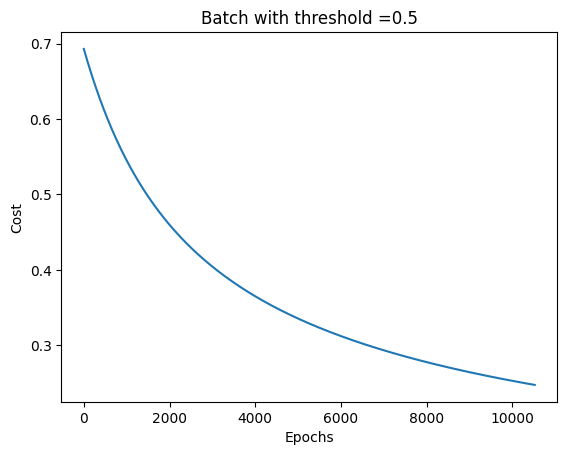

Threshold = 0.6
0.9526315789473684 0.9016393442622951 0.9482758620689655
Threshold = 0.7
0.9421052631578948 0.8360655737704918 0.9807692307692307
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
2       1.584809      0.455786        1.563744   1.557513         0.941382   
5      -0.473726     -0.834601       -0.389261  -0.505206         2.235455   
7      -0.115473      0.358135       -0.075084  -0.218772         1.602639   
8      -0.317346      0.588312       -0.186261  -0.383870         2.199903   
12      1.436958      1.281168        1.662567   1.330185         0.073927   
..           ...           ...             ...        ...              ...   
555    -1.087874      1.934499       -1.085146  -0.947643        -0.430903   
563     1.934532      1.348594        2.099039   1.966704         0.962713   
564     2.116502      0.720838        2.057863   2.341795         1.040926   
567     1.843547      2.334403        1.979627   1.733693         1.

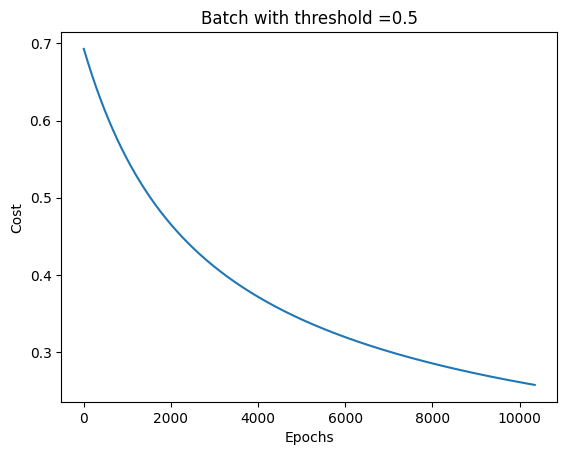

Threshold = 0.6
0.9578947368421052 0.9027777777777778 0.9848484848484849
Threshold = 0.7
0.9368421052631579 0.8333333333333334 1.0
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
3      -0.766584      0.253509       -0.594733  -0.763792         3.280667   
5      -0.473726     -0.834601       -0.389261  -0.505206         2.235455   
6       1.175376      0.160508        1.135507   1.094332        -0.123028   
9      -0.470883      1.104467       -0.331614  -0.508616         1.581308   
11      0.473086     -0.325421        0.476682   0.358357         0.052596   
..           ...           ...             ...        ...              ...   
558     0.134736      0.788264        0.179799   0.006282        -0.826946   
559    -0.740994      1.078892       -0.720733  -0.714348        -0.266656   
560    -0.018801      1.827549       -0.026496  -0.154836         0.208311   
562     0.313863      2.634331        0.468447   0.176210         0.600088   
566  

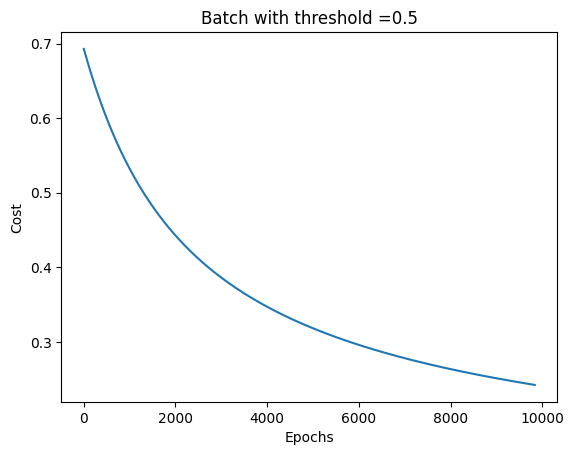

Threshold = 0.6
0.9263157894736842 0.8484848484848485 0.9333333333333333
Threshold = 0.7
0.9315789473684211 0.8181818181818182 0.9818181818181818
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
3      -0.766584      0.253509       -0.594733  -0.763792         3.280667   
4       1.755405     -1.150804        1.773744   1.824624         0.280125   
7      -0.115473      0.358135       -0.075084  -0.218772         1.602639   
9      -0.470883      1.104467       -0.331614  -0.508616         1.581308   
11      0.473086     -0.325421        0.476682   0.358357         0.052596   
..           ...           ...             ...        ...              ...   
556    -1.124837      0.069832       -1.123852  -0.975207         0.280125   
559    -0.740994      1.078892       -0.720733  -0.714348        -0.266656   
563     1.934532      1.348594        2.099039   1.966704         0.962713   
564     2.116502      0.720838        2.057863   2.341795         1.

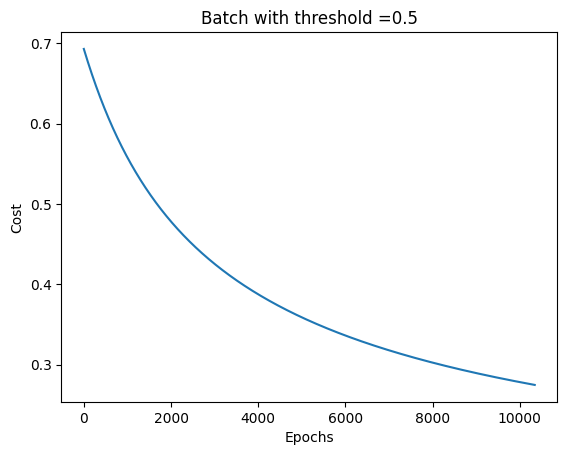

Threshold = 0.6
0.9526315789473684 0.8918918918918919 0.9850746268656716
Threshold = 0.7
0.9368421052631579 0.8378378378378378 1.0
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.101451     -2.071512        1.267272   0.983510         1.567087   
6       1.175376      0.160508        1.135507   1.094332        -0.123028   
7      -0.115473      0.358135       -0.075084  -0.218772         1.602639   
12      1.436958      1.281168        1.662567   1.330185         0.073927   
14     -0.109786      0.771989        0.064916  -0.217636         1.190242   
..           ...           ...             ...        ...              ...   
556    -1.124837      0.069832       -1.123852  -0.975207         0.280125   
557    -1.334387      1.997275       -1.349088  -1.090008        -1.075807   
562     0.313863      2.634331        0.468447   0.176210         0.600088   
563     1.934532      1.348594        2.099039   1.966704         0.962713   
565  

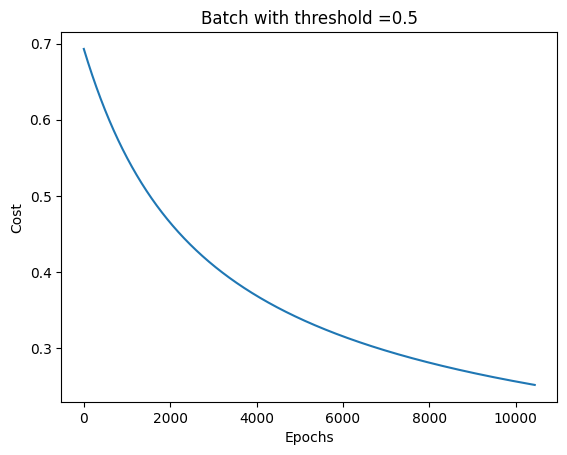

Threshold = 0.6
0.9421052631578948 0.8961038961038961 0.9583333333333334
Threshold = 0.7
0.9421052631578948 0.8701298701298701 0.9852941176470589
Average acucuracy for  0.3 threshold is = 0.8478947368421054
Average precision for  0.3 threshold is = 0.7117759802043597
Average recall for  0.3 threshold is = 0.9899302488697981
Average acucuracy for  0.4 threshold is = 0.9110526315789473
Average precision for  0.4 threshold is = 0.819051893833803
Average recall for  0.4 threshold is = 0.9784731386122845
Average acucuracy for  0.5 threshold is = 0.9536842105263157
Average precision for  0.5 threshold is = 0.9261751614381443
Average recall for  0.5 threshold is = 0.9498224880020226
Average acucuracy for  0.6 threshold is = 0.9389473684210526
Average precision for  0.6 threshold is = 0.9630454099333837
Average recall for  0.6 threshold is = 0.8686538560613124
Average acucuracy for  0.7 threshold is = 0.9310526315789475
Average precision for  0.7 threshold is = 0.9917578499931441
Average recal

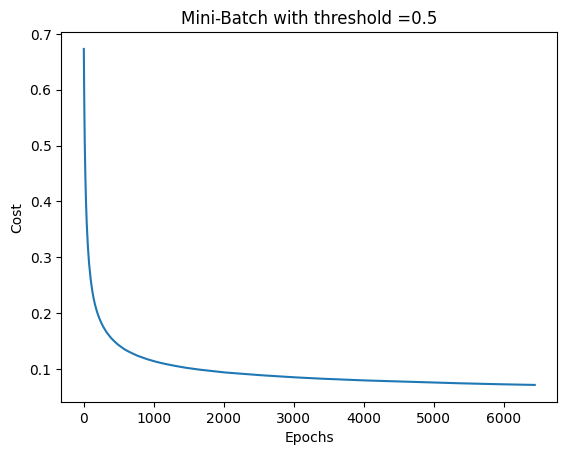

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


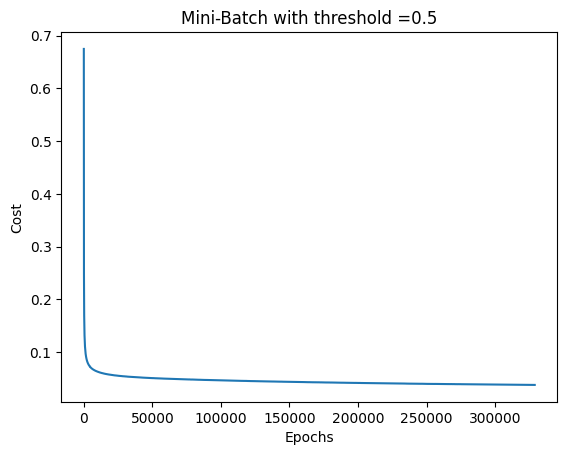

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


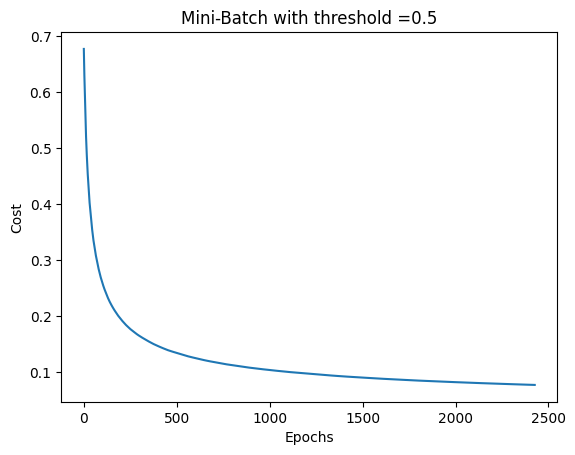

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


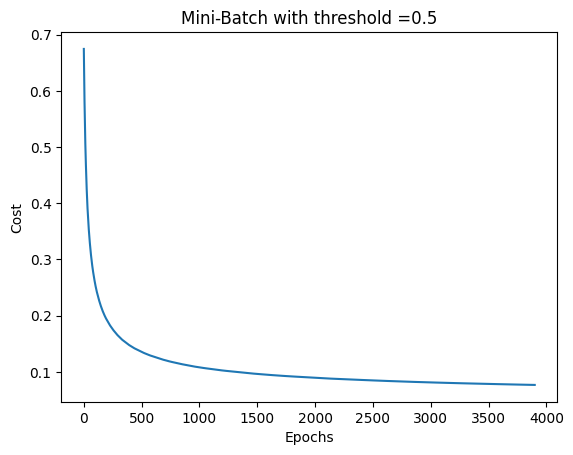

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


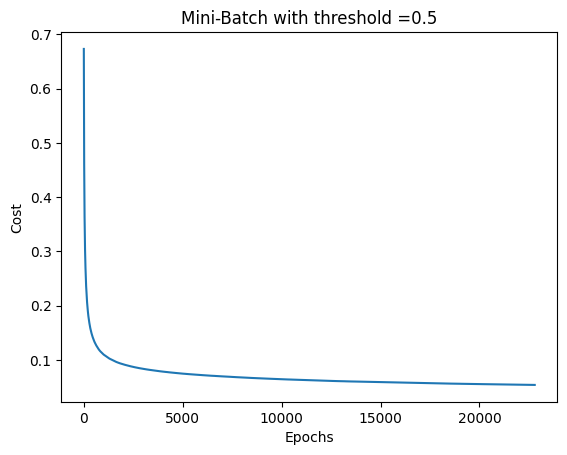

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


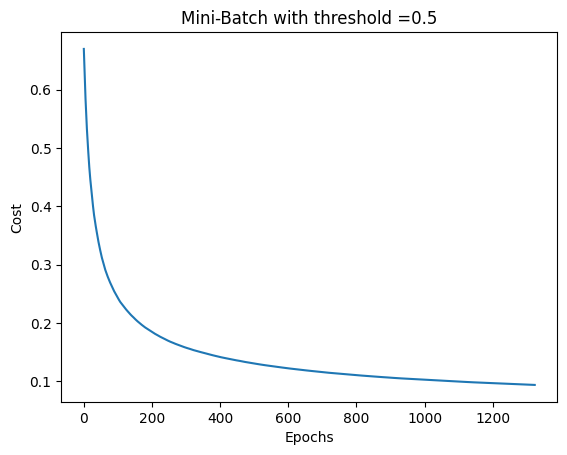

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


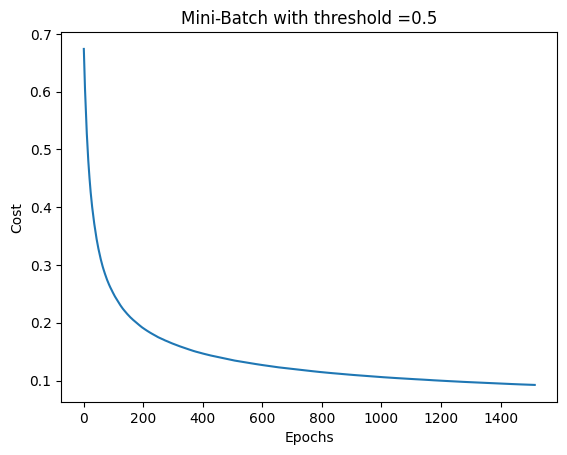

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


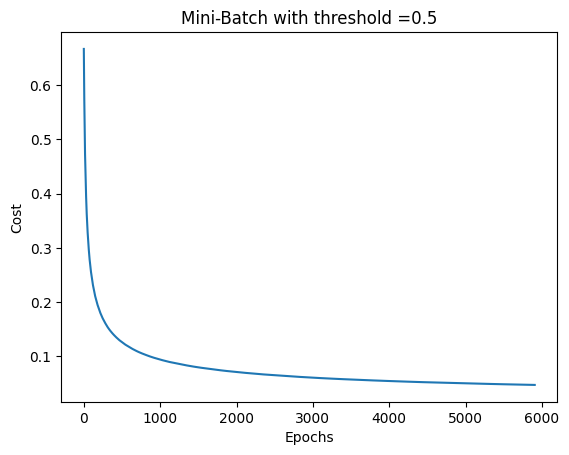

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


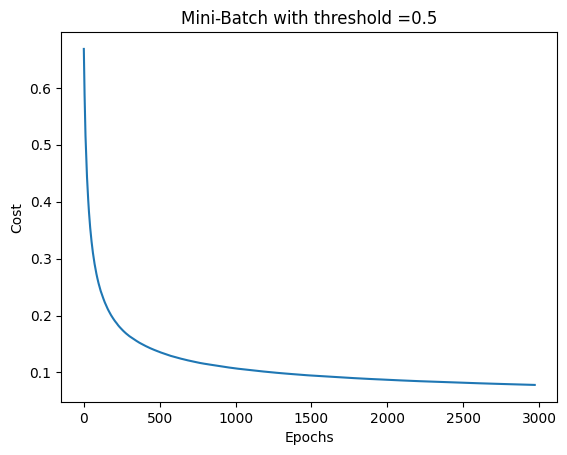

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


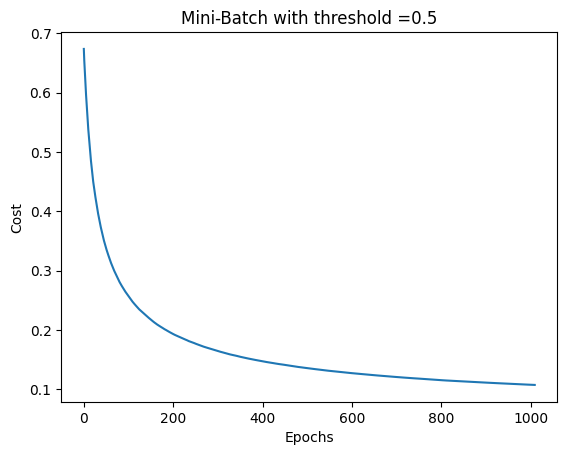

Threshold = 0.6
Threshold = 0.7
Average acucuracy for  0.3 threshold is = 0.9547368421052632
Average precision for  0.3 threshold is = 0.9085802855827355
Average recall for  0.3 threshold is = 0.9742177562974934
Average acucuracy for  0.4 threshold is = 0.9657894736842105
Average precision for  0.4 threshold is = 0.9423242835201803
Average recall for  0.4 threshold is = 0.965683760567026
Average acucuracy for  0.5 threshold is = 0.9710526315789474
Average precision for  0.5 threshold is = 0.9607336143504945
Average recall for  0.5 threshold is = 0.9614470137073282
Average acucuracy for  0.6 threshold is = 0.9710526315789474
Average precision for  0.6 threshold is = 0.9803041873135663
Average recall for  0.6 threshold is = 0.9410037738110256
Average acucuracy for  0.7 threshold is = 0.9668421052631578
Average precision for  0.7 threshold is = 0.9960714285714284
Average recall for  0.7 threshold is = 0.9138316564619124
Learning Rate= 0.001
MINI-BATCH
Threshold = 0.3
Threshold = 0.4
Thres

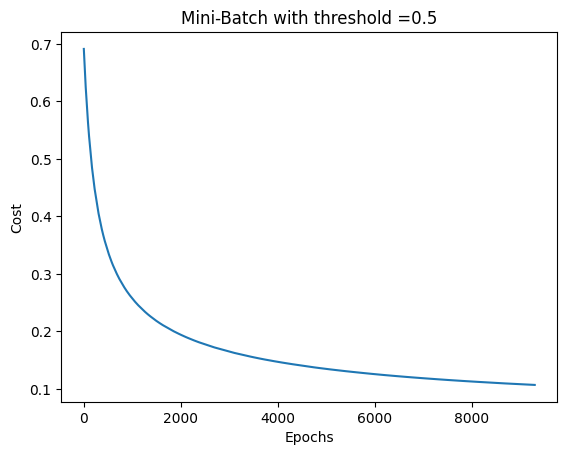

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


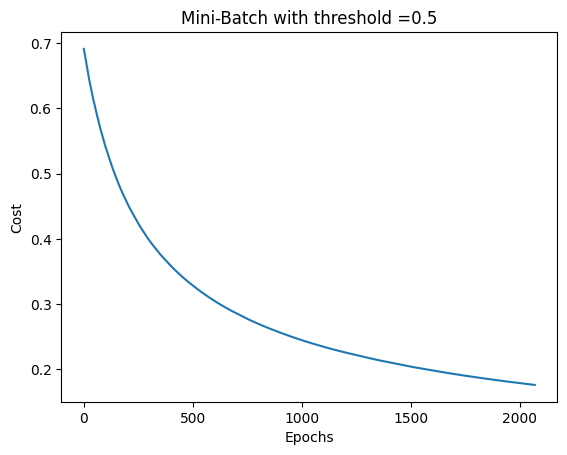

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


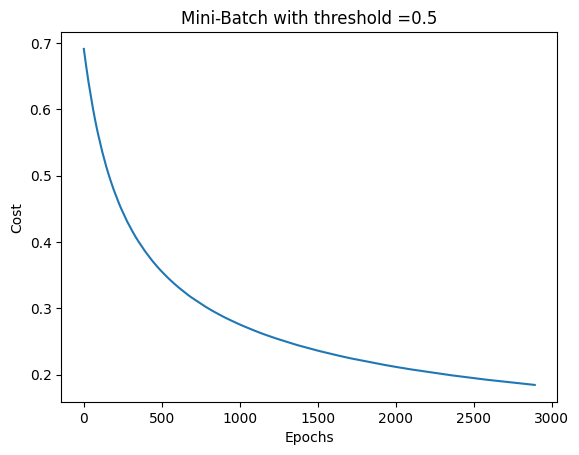

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


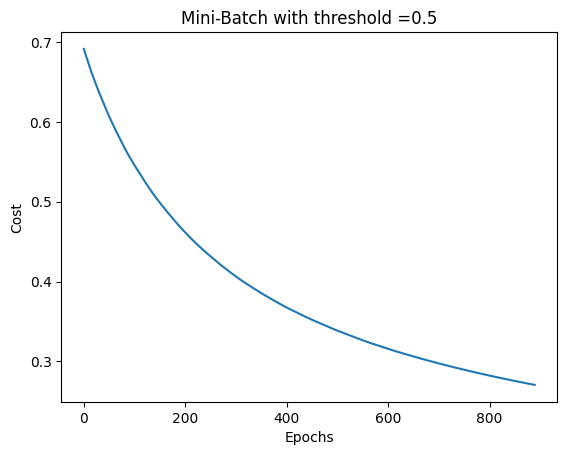

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


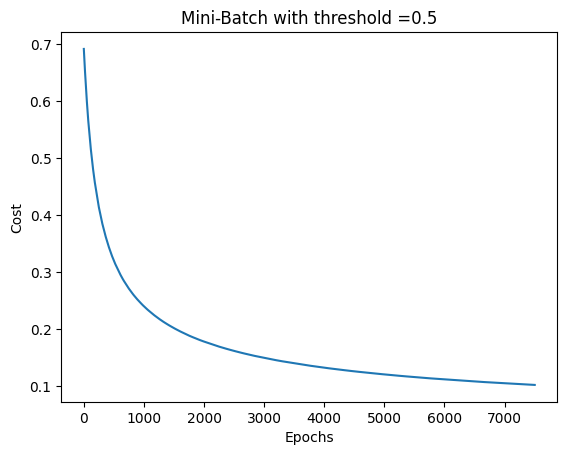

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


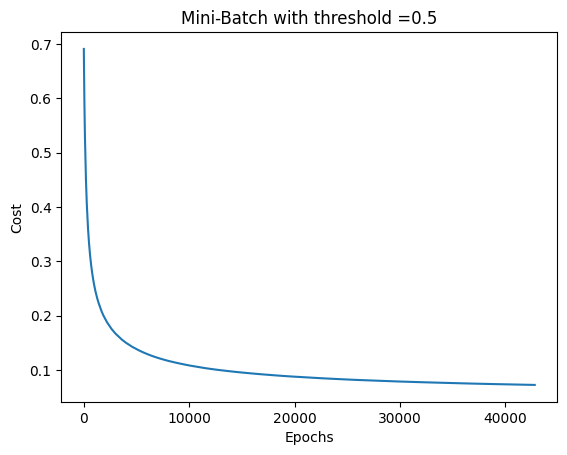

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


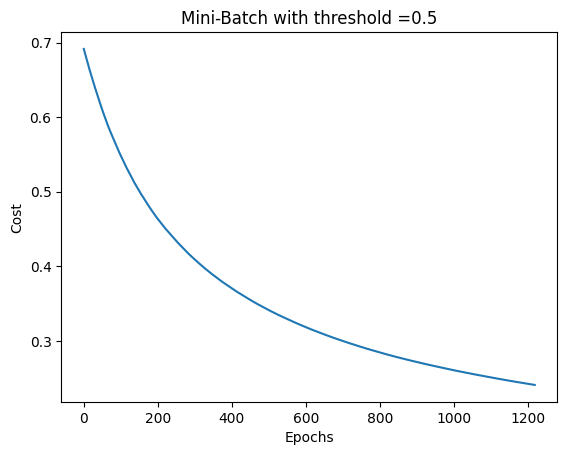

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


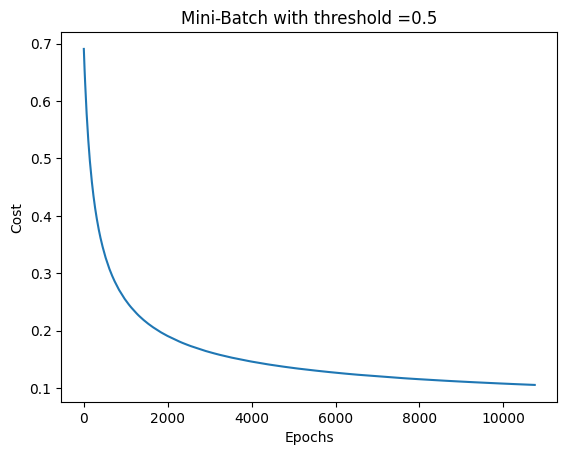

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


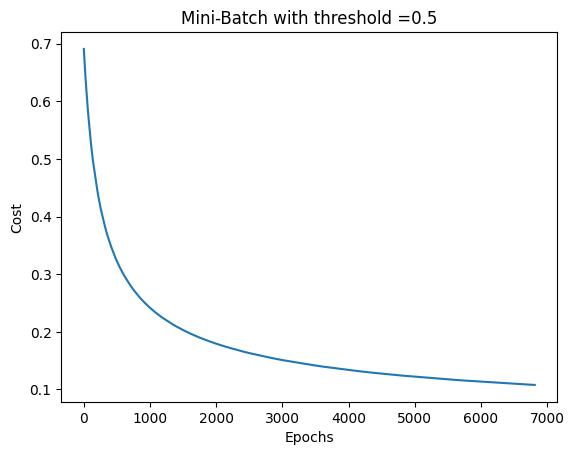

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


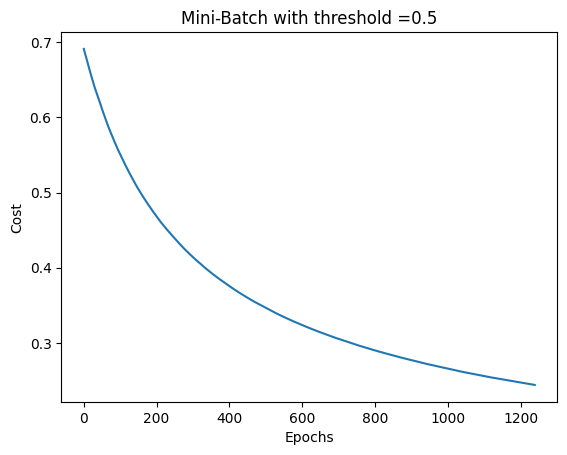

Threshold = 0.6
Threshold = 0.7
Average acucuracy for  0.3 threshold is = 0.9063157894736843
Average precision for  0.3 threshold is = 0.8105998827336244
Average recall for  0.3 threshold is = 0.9857604832977966
Average acucuracy for  0.4 threshold is = 0.9421052631578947
Average precision for  0.4 threshold is = 0.8828972962196646
Average recall for  0.4 threshold is = 0.9771806443970622
Average acucuracy for  0.5 threshold is = 0.9594736842105263
Average precision for  0.5 threshold is = 0.9344460017791101
Average recall for  0.5 threshold is = 0.9589590147975751
Average acucuracy for  0.6 threshold is = 0.9578947368421054
Average precision for  0.6 threshold is = 0.9686220266348068
Average recall for  0.6 threshold is = 0.9174703418734215
Average acucuracy for  0.7 threshold is = 0.9457894736842105
Average precision for  0.7 threshold is = 0.9936250219806969
Average recall for  0.7 threshold is = 0.8609251652896089
Learning Rate= 0.0001
MINI-BATCH
Threshold = 0.3
Threshold = 0.4
Thr

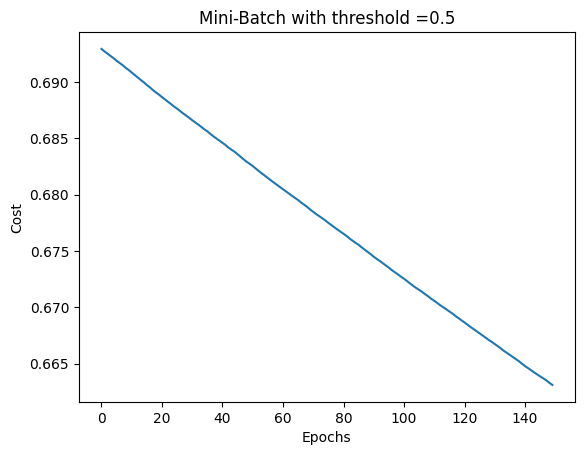

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


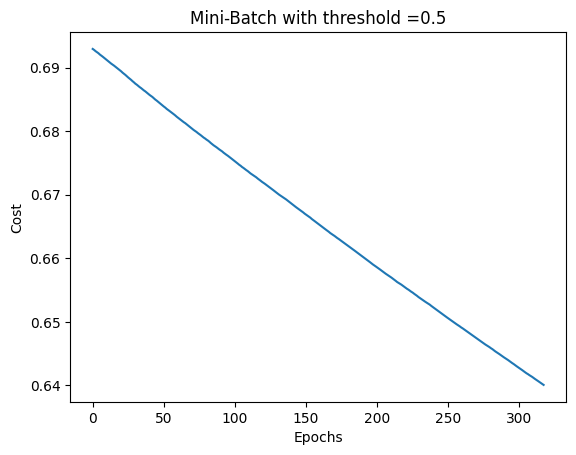

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


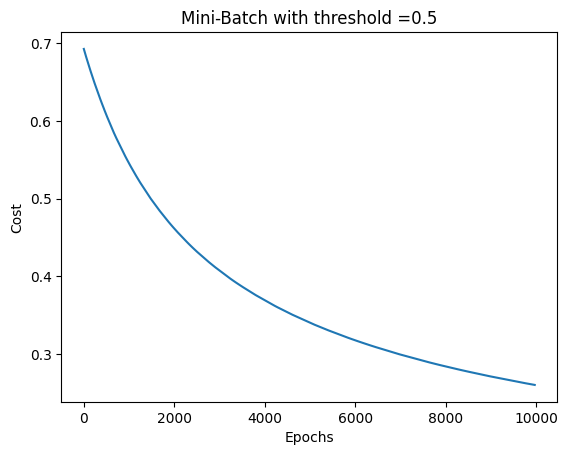

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


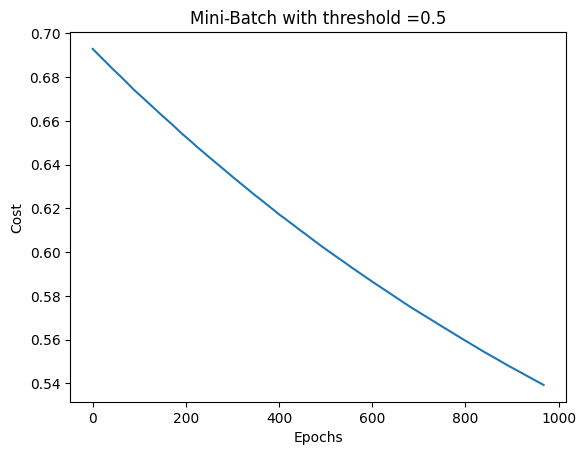

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


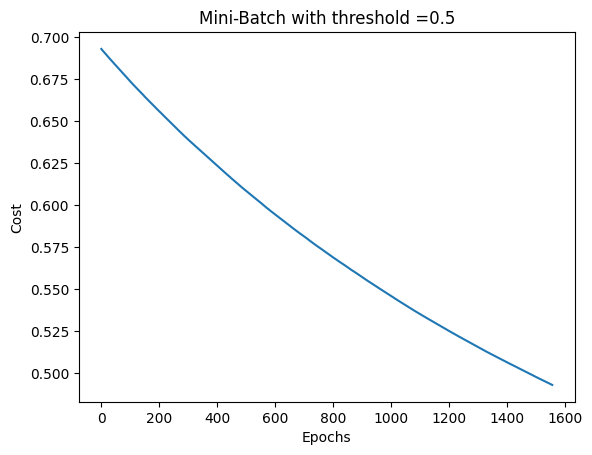

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


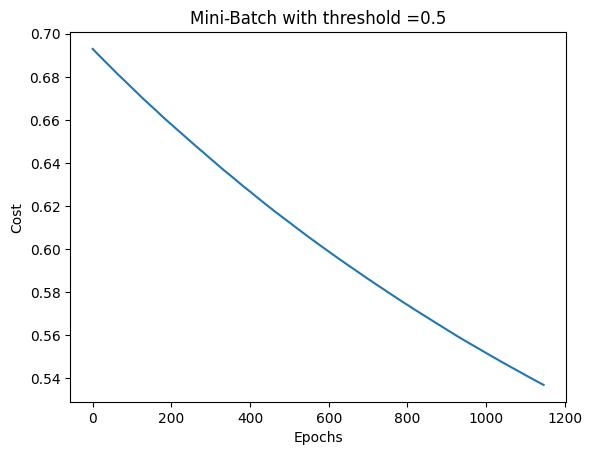

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


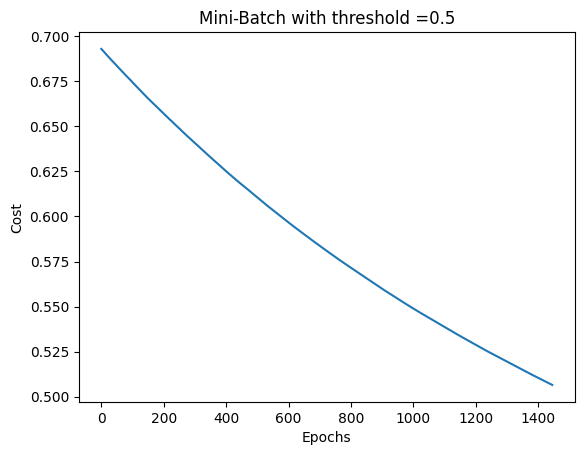

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


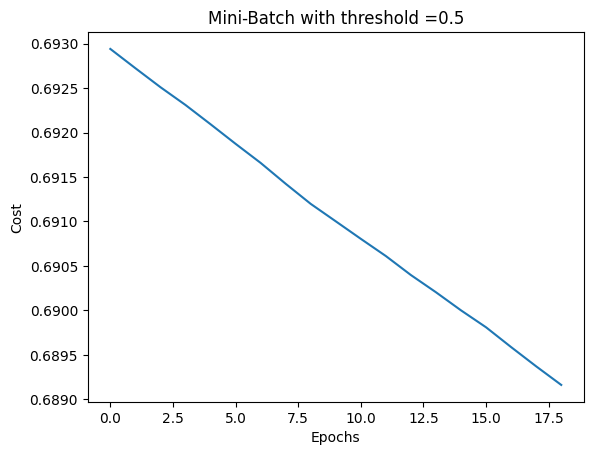

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


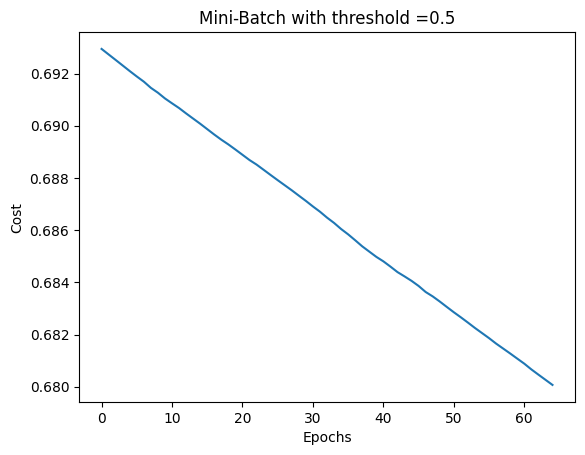

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


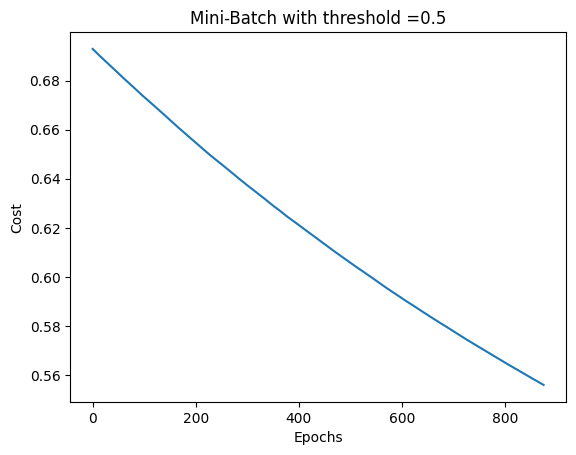

Threshold = 0.6
Threshold = 0.7
Average acucuracy for  0.3 threshold is = 0.40894736842105256
Average precision for  0.3 threshold is = 0.39321679123536707
Average recall for  0.3 threshold is = 0.9999999999999999
Average acucuracy for  0.4 threshold is = 0.5184210526315789
Average precision for  0.4 threshold is = 0.4570737768775967
Average recall for  0.4 threshold is = 0.9999999999999999
Average acucuracy for  0.5 threshold is = 0.9384210526315788
Average precision for  0.5 threshold is = 0.9052577663373856
Average recall for  0.5 threshold is = 0.9261851095729287
Average acucuracy for  0.6 threshold is = 0.7826315789473683
Average precision for  0.6 threshold is = 0.6978723404255319
Average recall for  0.6 threshold is = 0.3997081583424867
Average acucuracy for  0.7 threshold is = 0.7031578947368422
Average precision for  0.7 threshold is = 0.6
Average recall for  0.7 threshold is = 0.1797455902306649
Learning Rate= 0.01
STOCHASTIC
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.

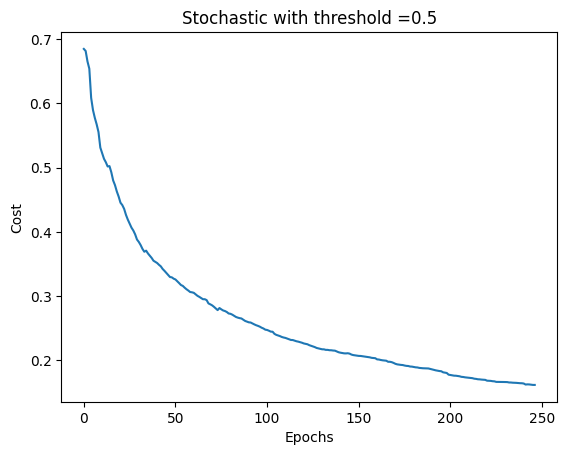

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


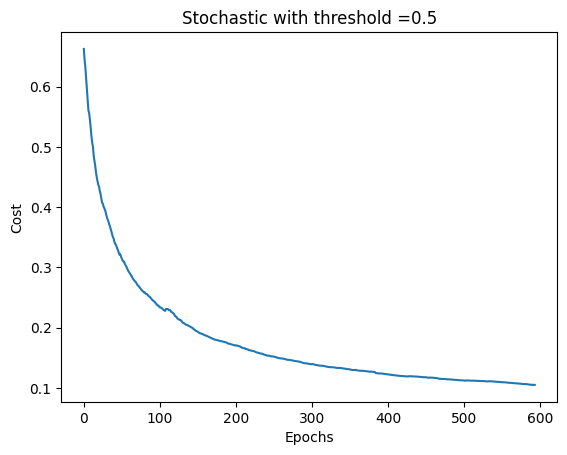

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


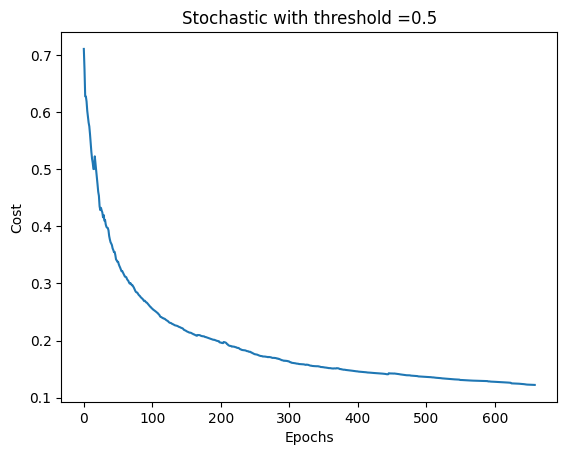

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


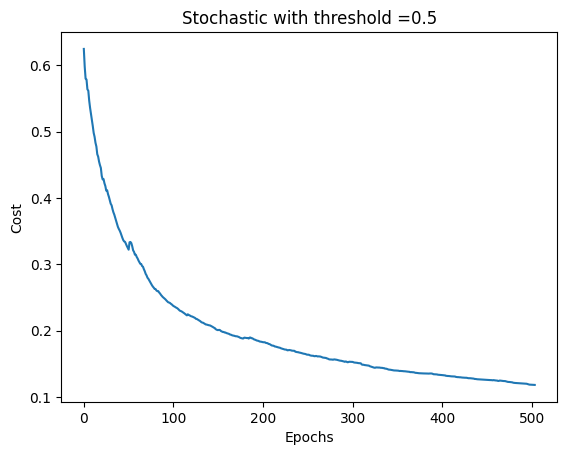

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


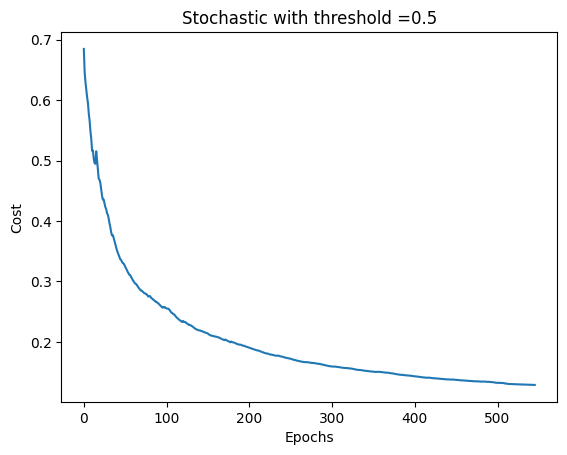

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


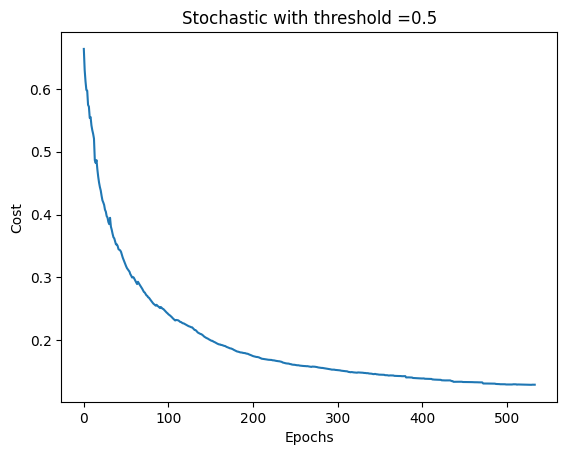

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


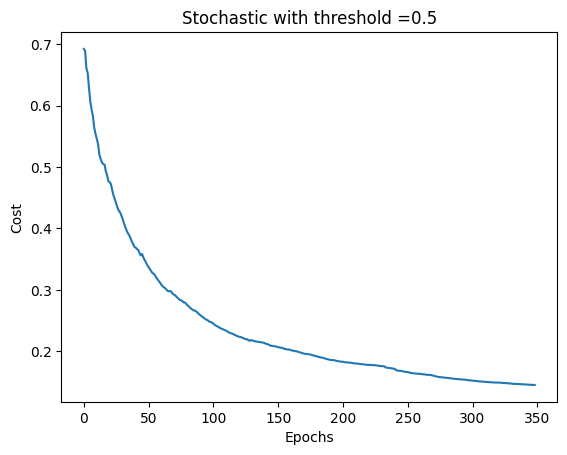

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


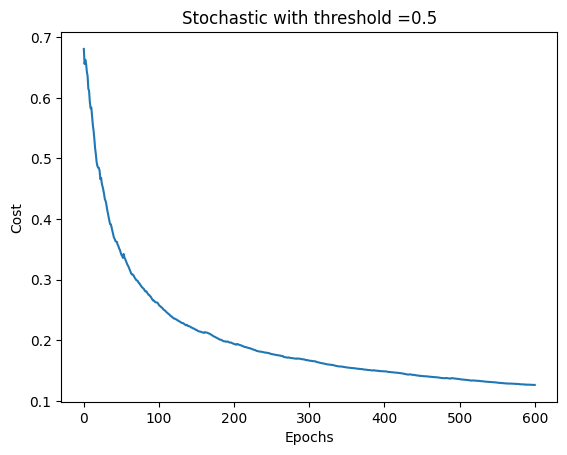

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


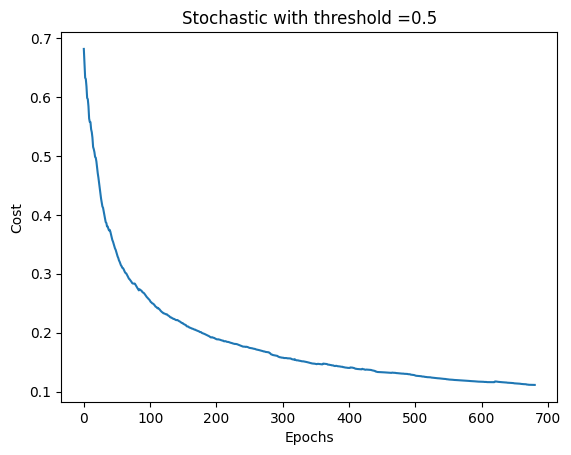

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


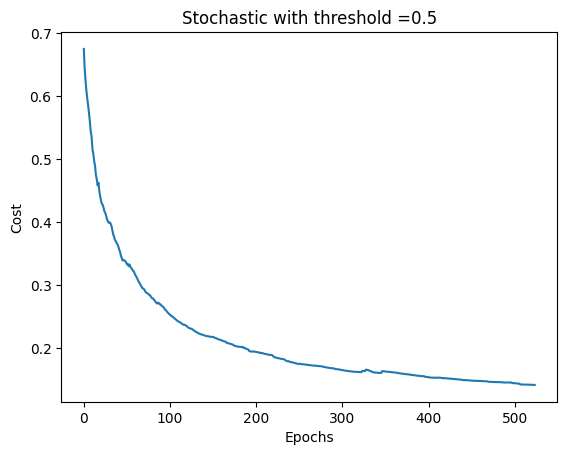

Threshold = 0.6
Threshold = 0.7
Average acucuracy for  0.3 threshold is = 0.9105263157894736
Average precision for  0.3 threshold is = 0.8207001660726267
Average recall for  0.3 threshold is = 0.973166981575728
Average acucuracy for  0.4 threshold is = 0.9389473684210526
Average precision for  0.4 threshold is = 0.8854903318964457
Average recall for  0.4 threshold is = 0.9617792227032043
Average acucuracy for  0.5 threshold is = 0.95
Average precision for  0.5 threshold is = 0.925674236334603
Average recall for  0.5 threshold is = 0.9414158080624572
Average acucuracy for  0.6 threshold is = 0.9494736842105262
Average precision for  0.6 threshold is = 0.9610804809583785
Average recall for  0.6 threshold is = 0.9001255430872538
Average acucuracy for  0.7 threshold is = 0.9426315789473686
Average precision for  0.7 threshold is = 0.9923814809977798
Average recall for  0.7 threshold is = 0.852065602881009
Learning Rate= 0.001
STOCHASTIC
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


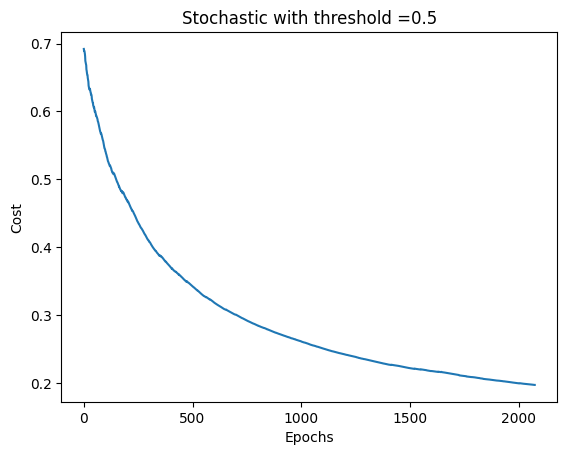

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


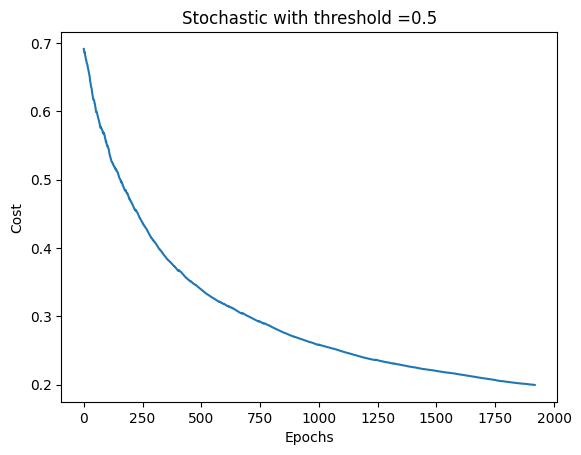

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


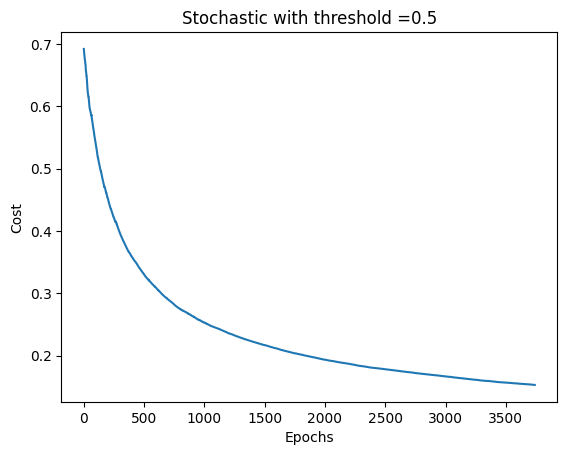

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


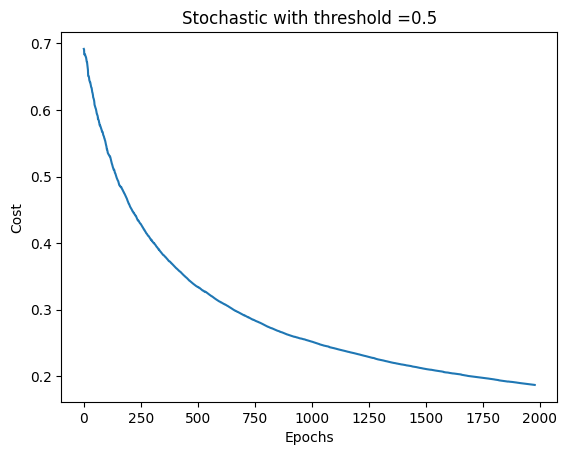

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


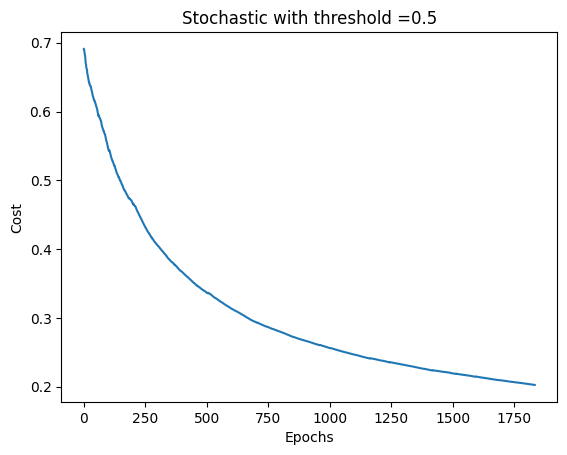

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


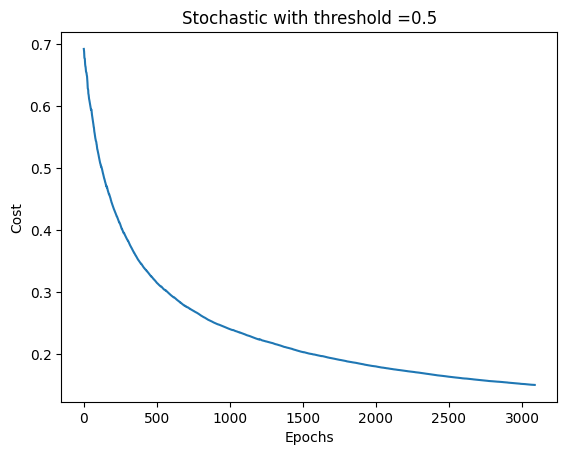

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


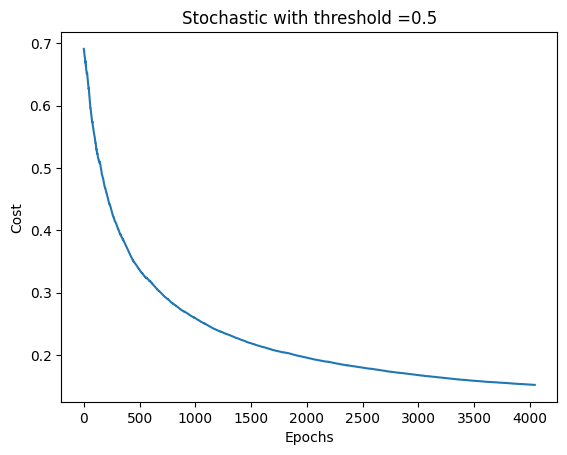

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


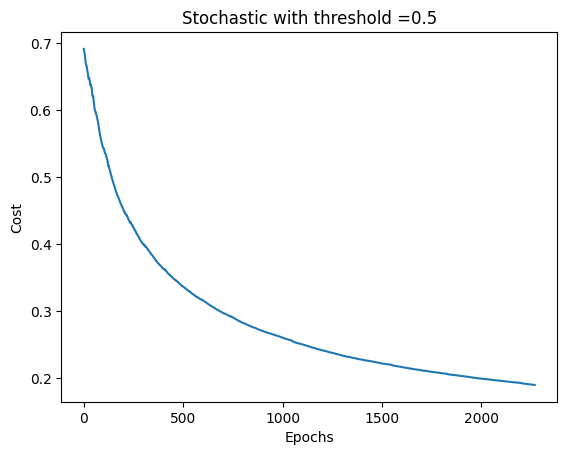

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


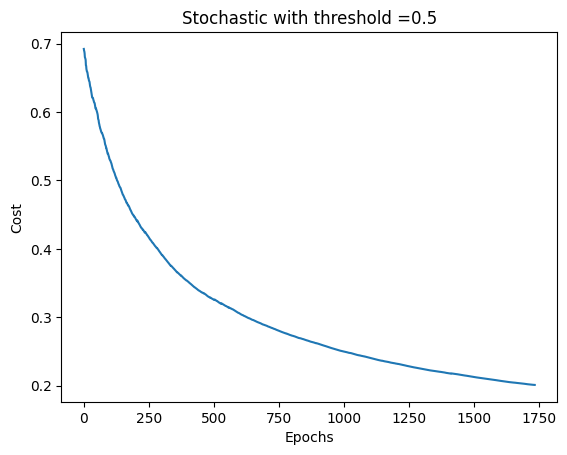

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


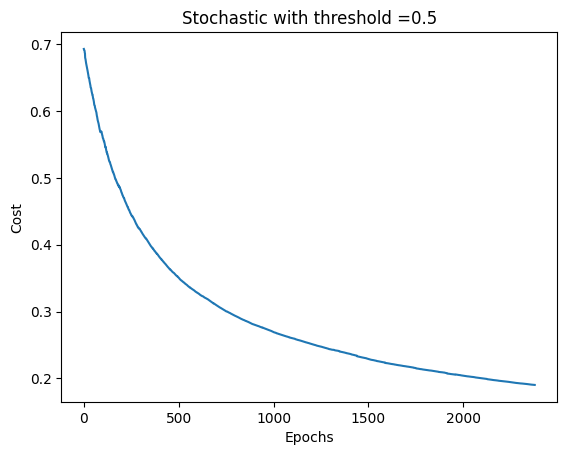

Threshold = 0.6
Threshold = 0.7
Average acucuracy for  0.3 threshold is = 0.888421052631579
Average precision for  0.3 threshold is = 0.7584783795126013
Average recall for  0.3 threshold is = 0.9889208271889373
Average acucuracy for  0.4 threshold is = 0.9294736842105263
Average precision for  0.4 threshold is = 0.8399291138499396
Average recall for  0.4 threshold is = 0.9816726908322341
Average acucuracy for  0.5 threshold is = 0.9557894736842105
Average precision for  0.5 threshold is = 0.9200345220002067
Average recall for  0.5 threshold is = 0.9545444426576518
Average acucuracy for  0.6 threshold is = 0.9521052631578946
Average precision for  0.6 threshold is = 0.958618046385361
Average recall for  0.6 threshold is = 0.9008553599257431
Average acucuracy for  0.7 threshold is = 0.9463157894736842
Average precision for  0.7 threshold is = 0.9897398669086508
Average recall for  0.7 threshold is = 0.8542353335337513
Learning Rate= 0.0001
STOCHASTIC
379
Threshold = 0.3
Threshold = 0.4
T

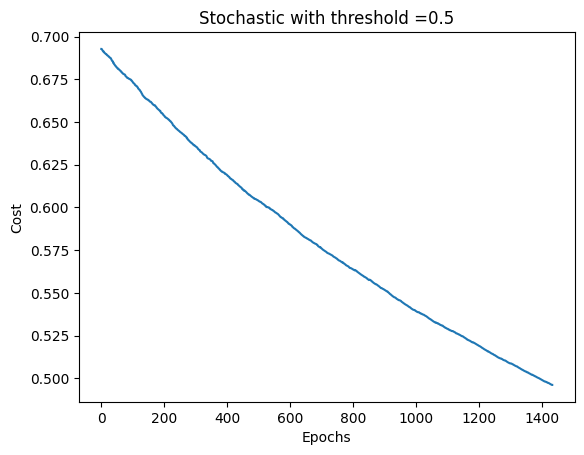

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


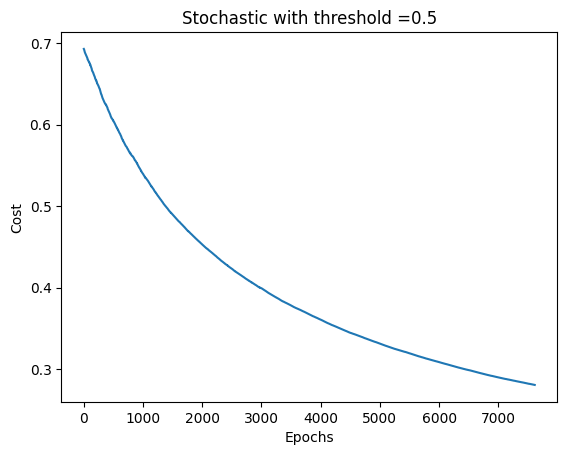

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


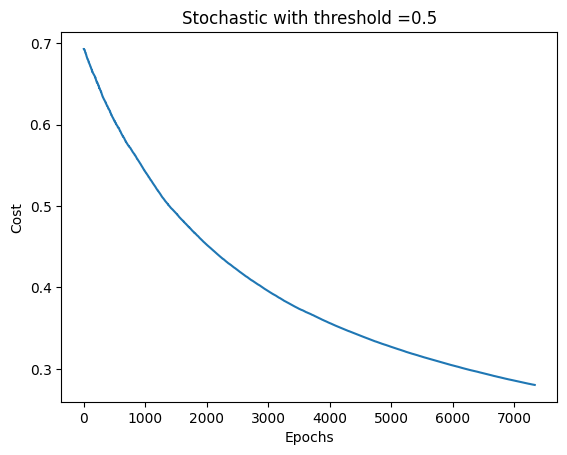

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


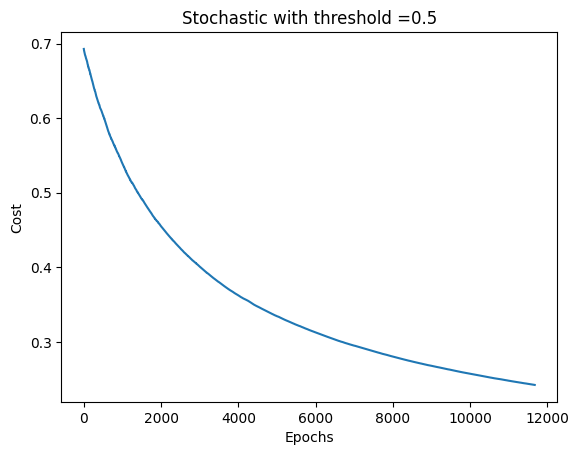

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


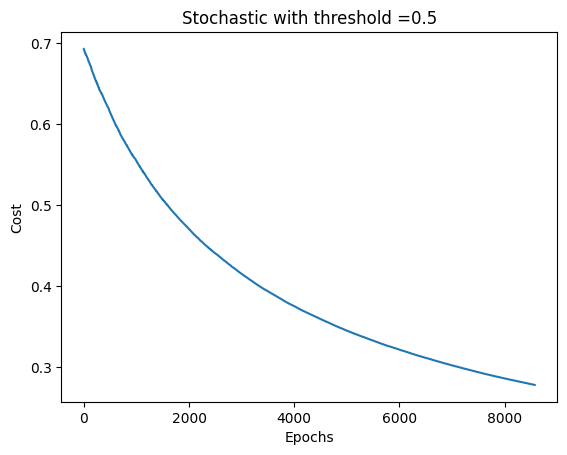

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


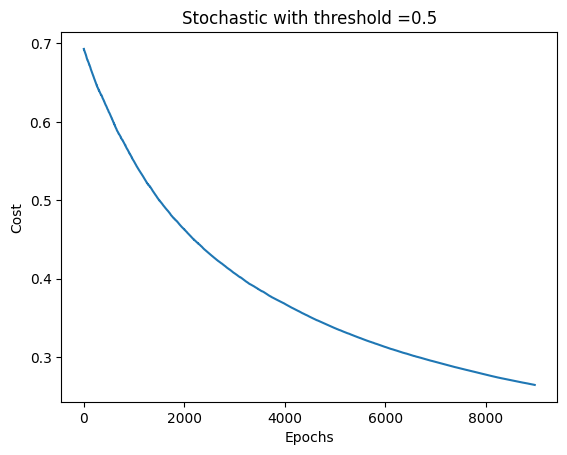

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


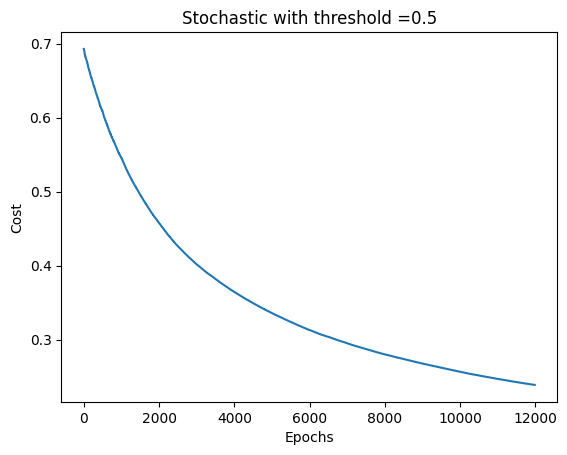

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


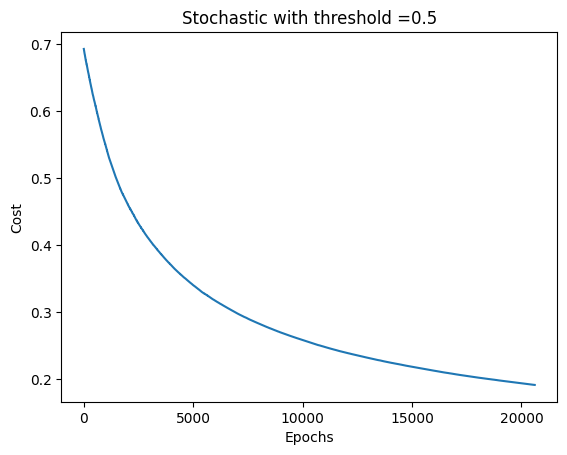

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


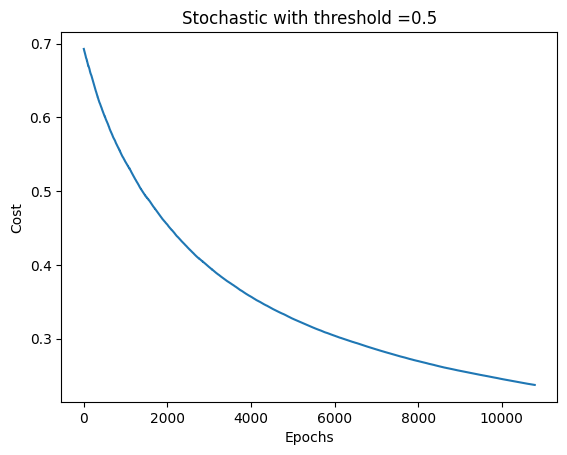

Threshold = 0.6
Threshold = 0.7
379
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


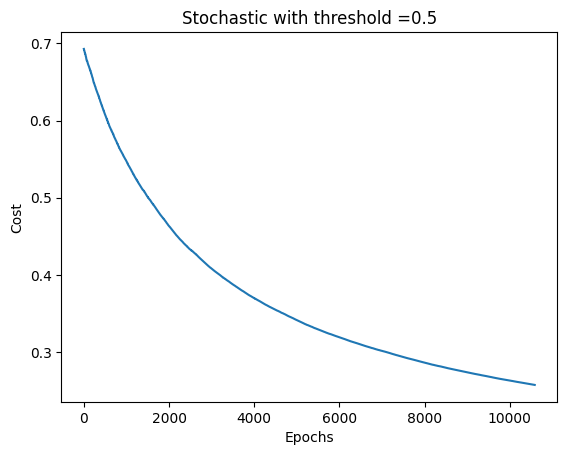

Threshold = 0.6
Threshold = 0.7
Average acucuracy for  0.3 threshold is = 0.801578947368421
Average precision for  0.3 threshold is = 0.6830626792669441
Average recall for  0.3 threshold is = 0.9905221679438585
Average acucuracy for  0.4 threshold is = 0.8931578947368422
Average precision for  0.4 threshold is = 0.8069034657825692
Average recall for  0.4 threshold is = 0.9760695678132922
Average acucuracy for  0.5 threshold is = 0.948421052631579
Average precision for  0.5 threshold is = 0.9320420782380117
Average recall for  0.5 threshold is = 0.9339120179208144
Average acucuracy for  0.6 threshold is = 0.9278947368421051
Average precision for  0.6 threshold is = 0.9672737972059656
Average recall for  0.6 threshold is = 0.8428683377696465
Average acucuracy for  0.7 threshold is = 0.8994736842105262
Average precision for  0.7 threshold is = 0.9902281616688395
Average recall for  0.7 threshold is = 0.7472943115074632


In [1313]:
threshval=[0.3,0.4,0.5,0.6,0.7]
learnVal=[0.01,0.001,0.0001]
modals=[0,1,2]
accuracyVal=[]
precisionVal=[]
recallVal=[]
count=0
for mode in modals:
  for learn in learnVal:

        print("Learning Rate=", learn)
        models(mode,learn,threshval,70)
